<a href="https://colab.research.google.com/github/View490/MOTOR_JAPAN/blob/main/Segmentation_Train_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
try:
    os.mkdir('datasets')
except FileExistsError as file_exist_error:
    print("Cannot create a file when folder 'datasets' already exists")

Cannot create a file when folder 'datasets' already exists


In [2]:
# Change current directory to dataset
%cd {HOME}/datasets

/content/datasets


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nxl5o1thFPMhTHCXkPOe")
project = rf.workspace("medium-oil-prf99").project("new-19z4l")
dataset = project.version(6).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.207, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to new-6 in yolov8:: 100%|██████████| 802/802 [00:00<00:00, 2726.98it/s]


In [4]:
# Change current directory to HOME
%cd {HOME}

/content


In [5]:
# What is dataset location?
dataset.location

'/content/datasets/new-6'

In [6]:
# Ultralytics check
!pip install ultralytics
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.5/107.7 GB disk)


In [7]:
# PyTorch check
import torch
torch.__version__

'2.1.0+cu118'

In [8]:
# Instantiate device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Current device is {device}")

Current device is cpu


In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-seg.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data=dataset.location+'/data.yaml', epochs=2, imgsz=640)



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load an official model
model = YOLO('/content/runs/segment/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # a list contains map50-95(B) of each category
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps   # a list contains map50-95(M) of each category


Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3259819 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/datasets/new-6/train/labels.cache... 398 images, 0 backgrounds, 0 corrupt: 100%|██████████| 398/398 [00:00<?, ?it/s]
train: WARNING ⚠️ /content/datasets/new-6/train/images/custom_name_178-0_jpg.rf.9957f7573a3ffe5e7407c700d70bf88b.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [03:18<00:00,  7.95s/it]
                   all        398       2557      0.997     0.0417     0.0829     0.0512      0.954      0.026     0.0309    0.00528
                  Belt        398        320          1          0   0.000642   0.000128          1          0   0.000108   4.32e-05
               GasMask        398        284          1          0   0.000312   0.000126        

array([ 4.3173e-05,  3.1806e-05,           0,  1.5228e-05,           0,           0,           0,    0.047444,           0])

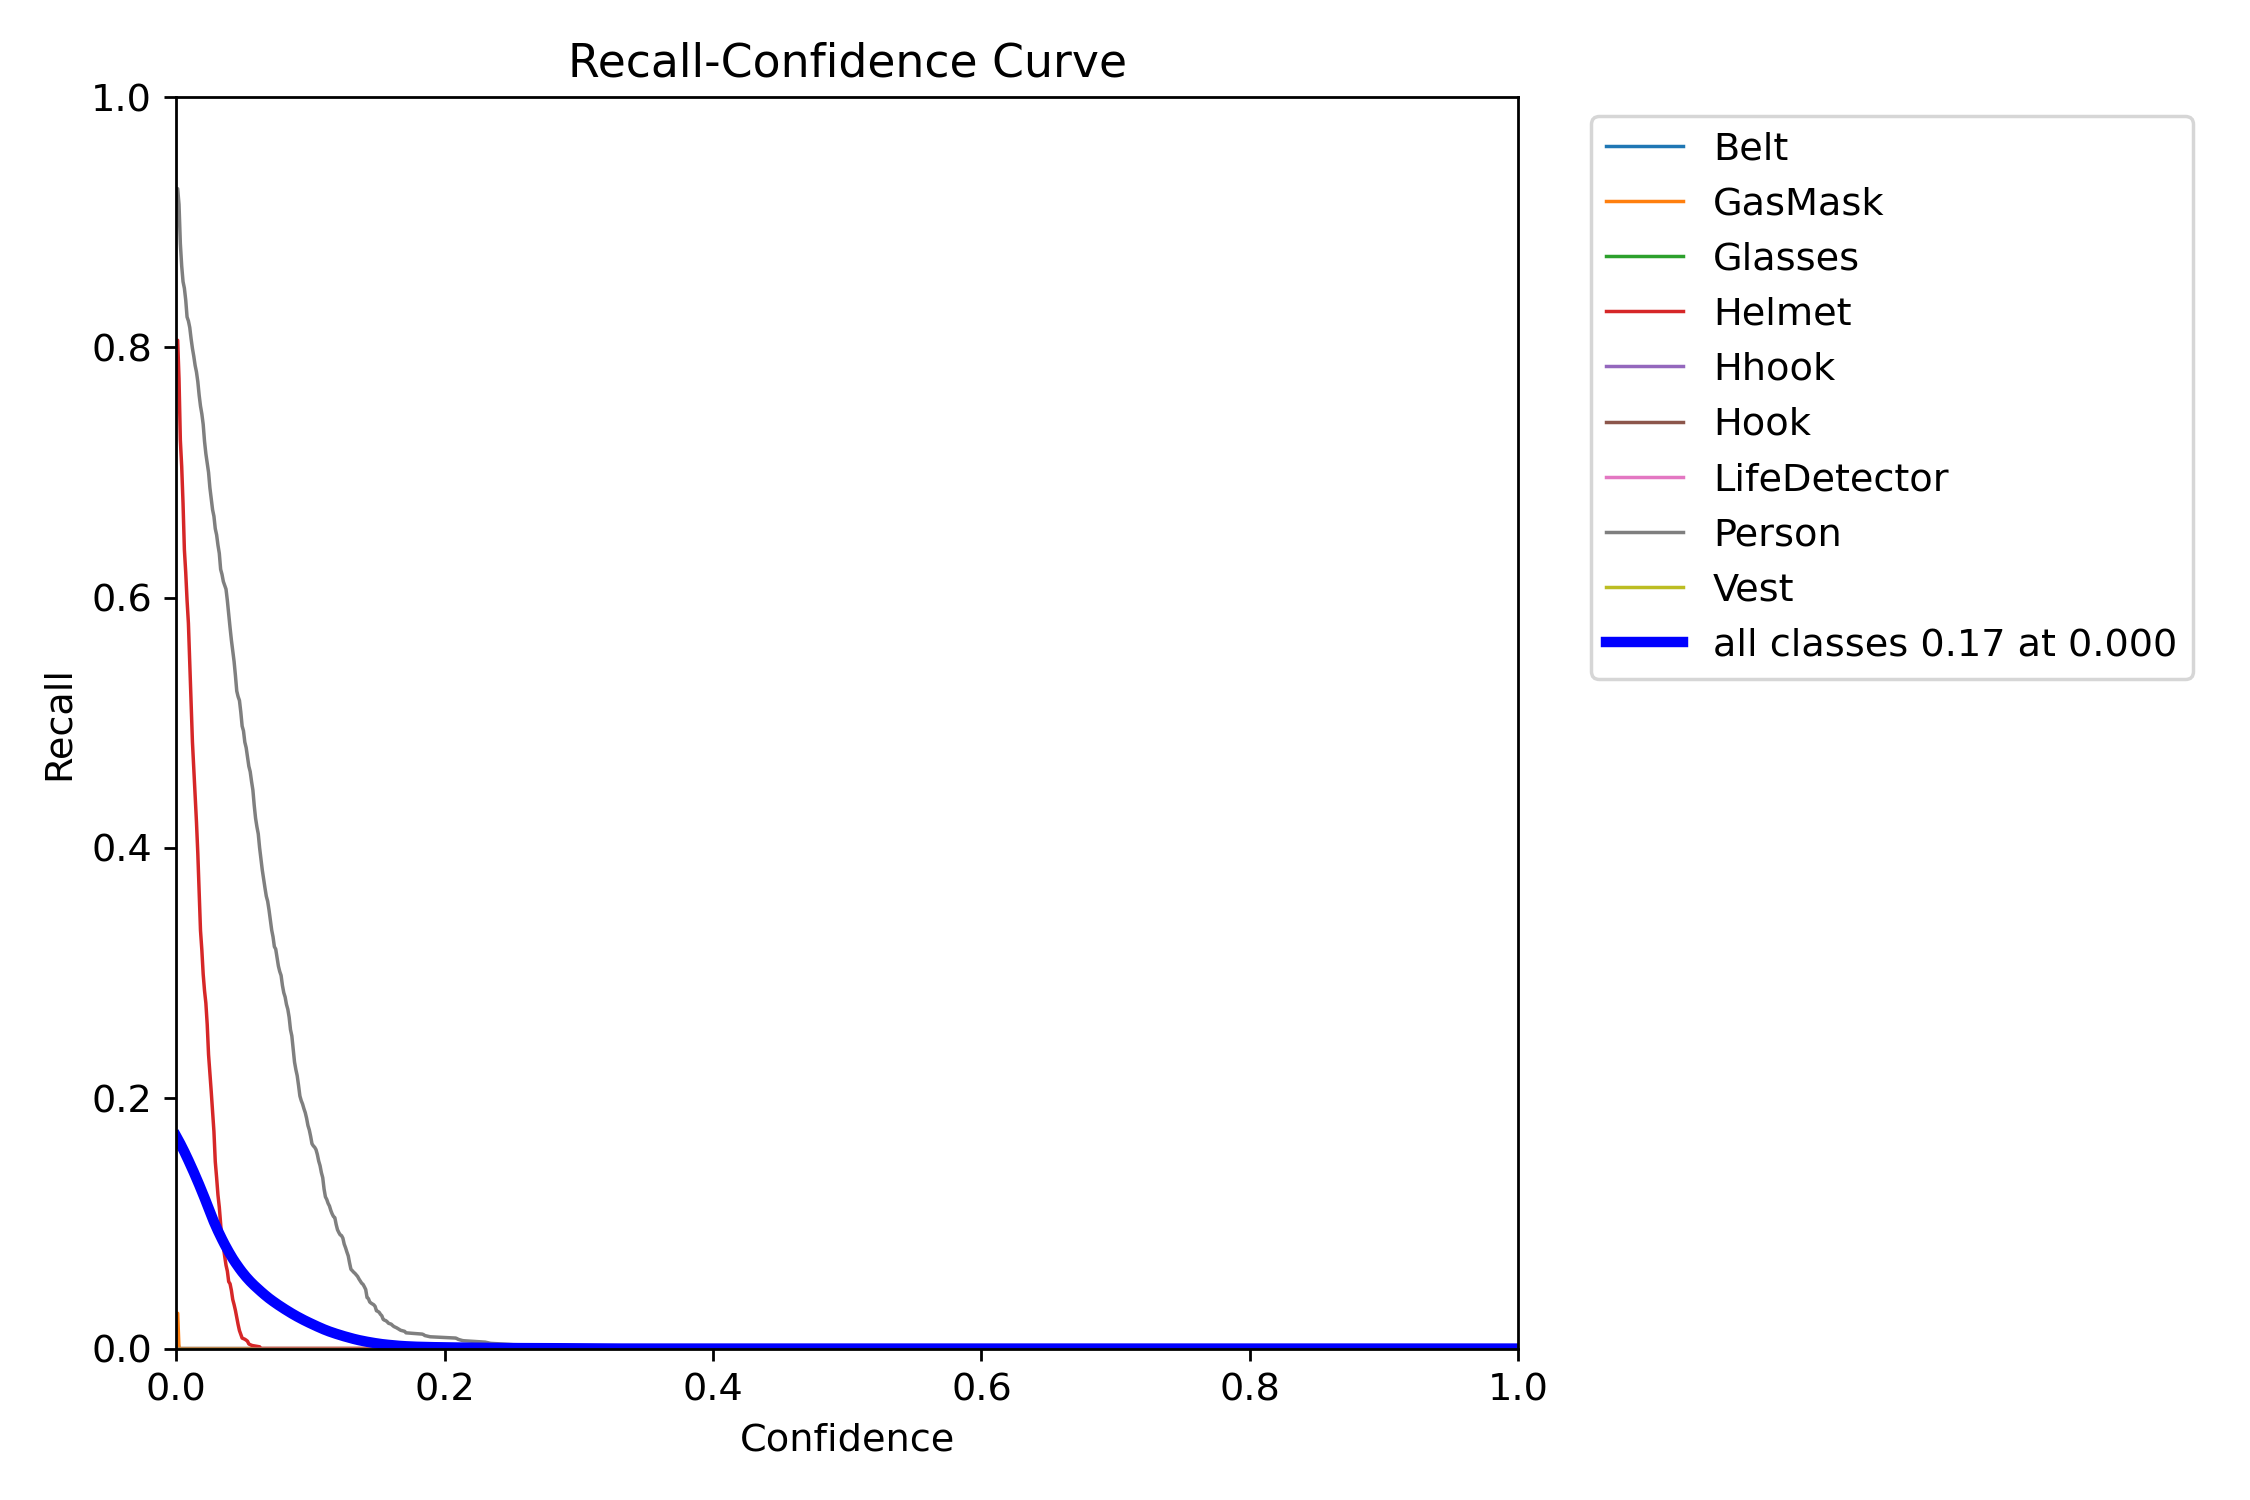

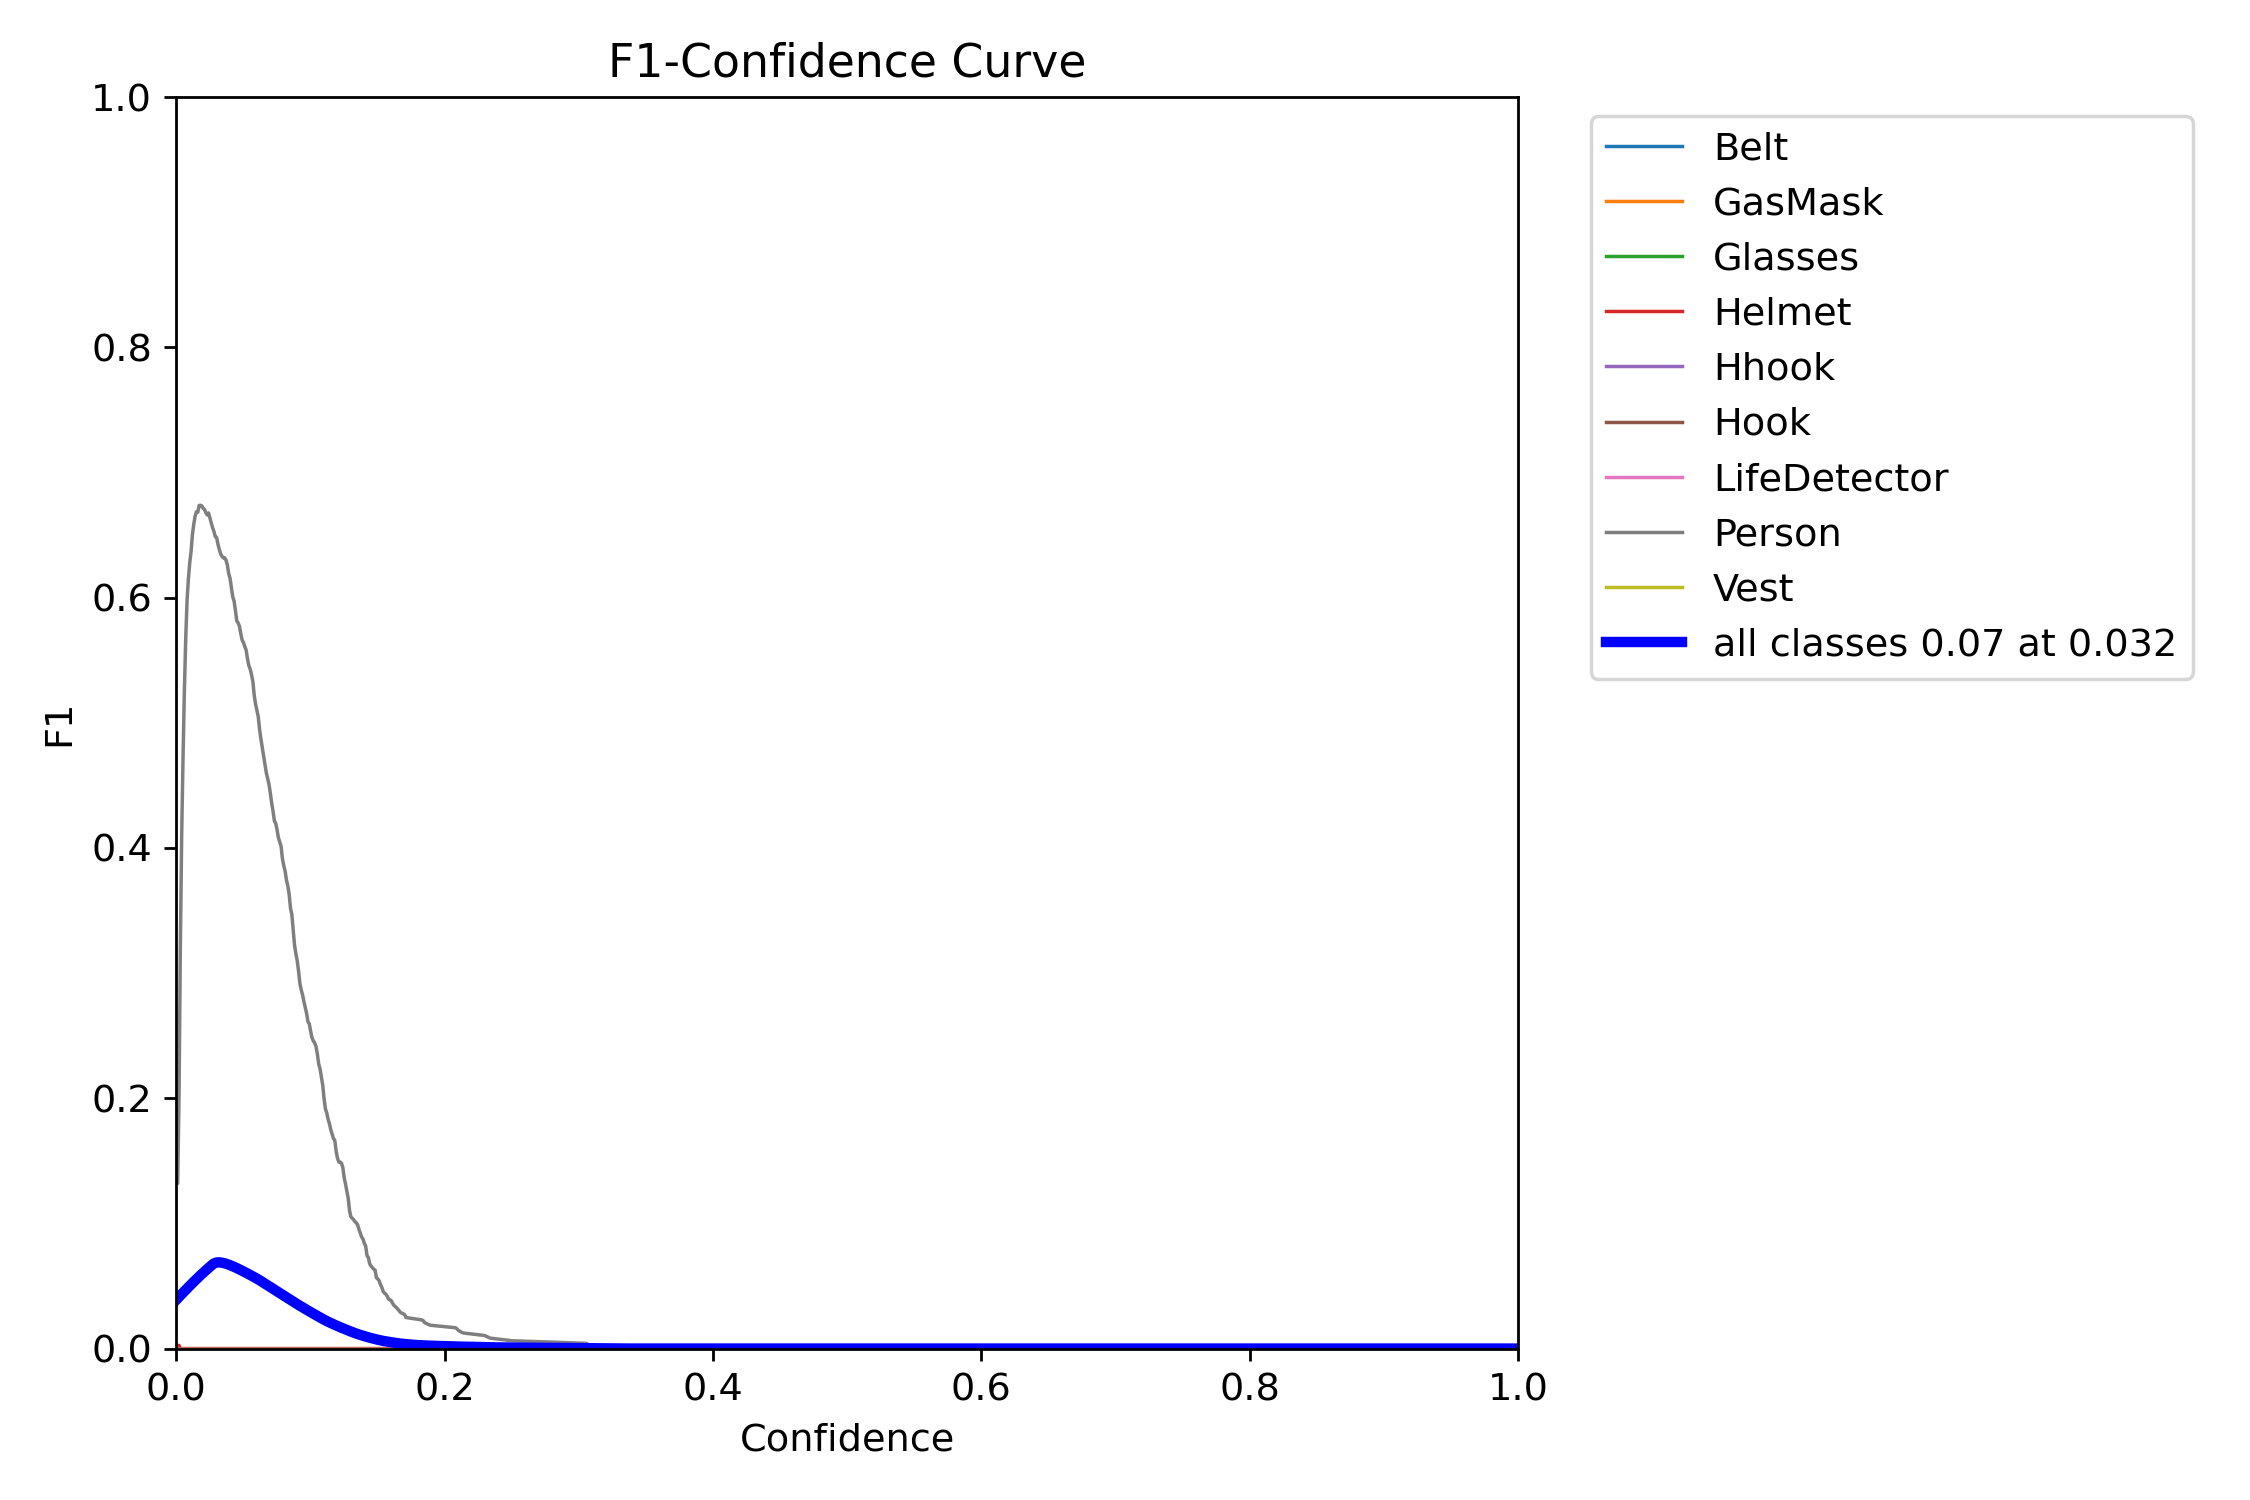

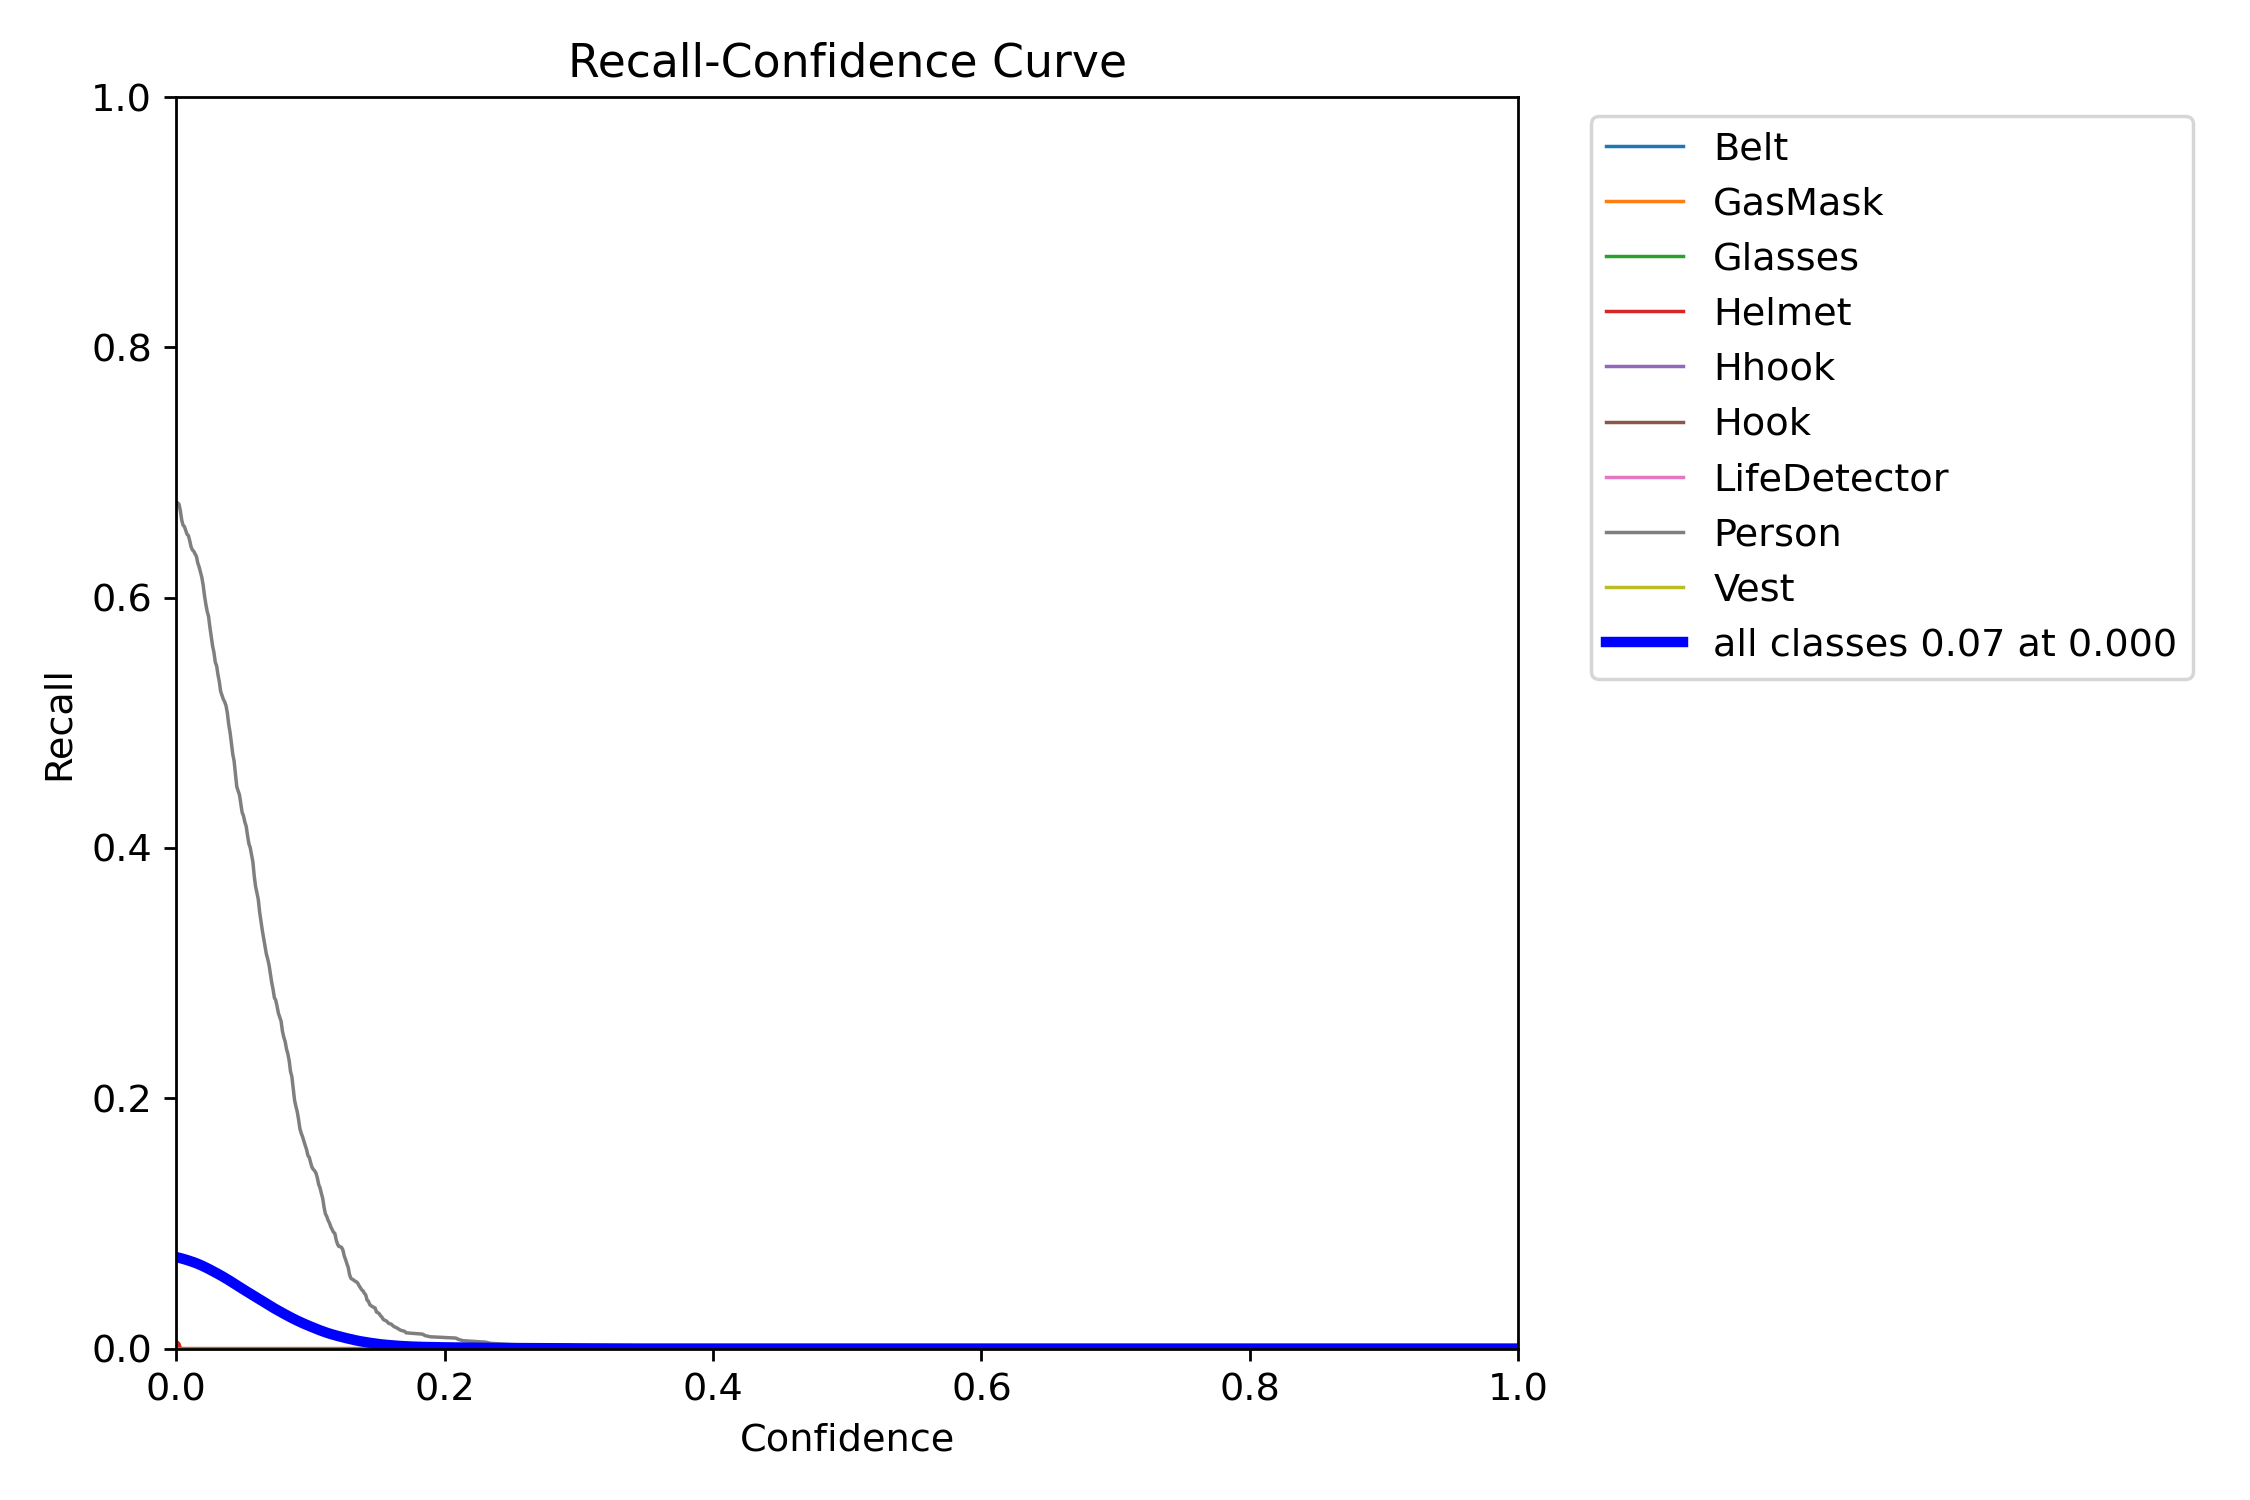

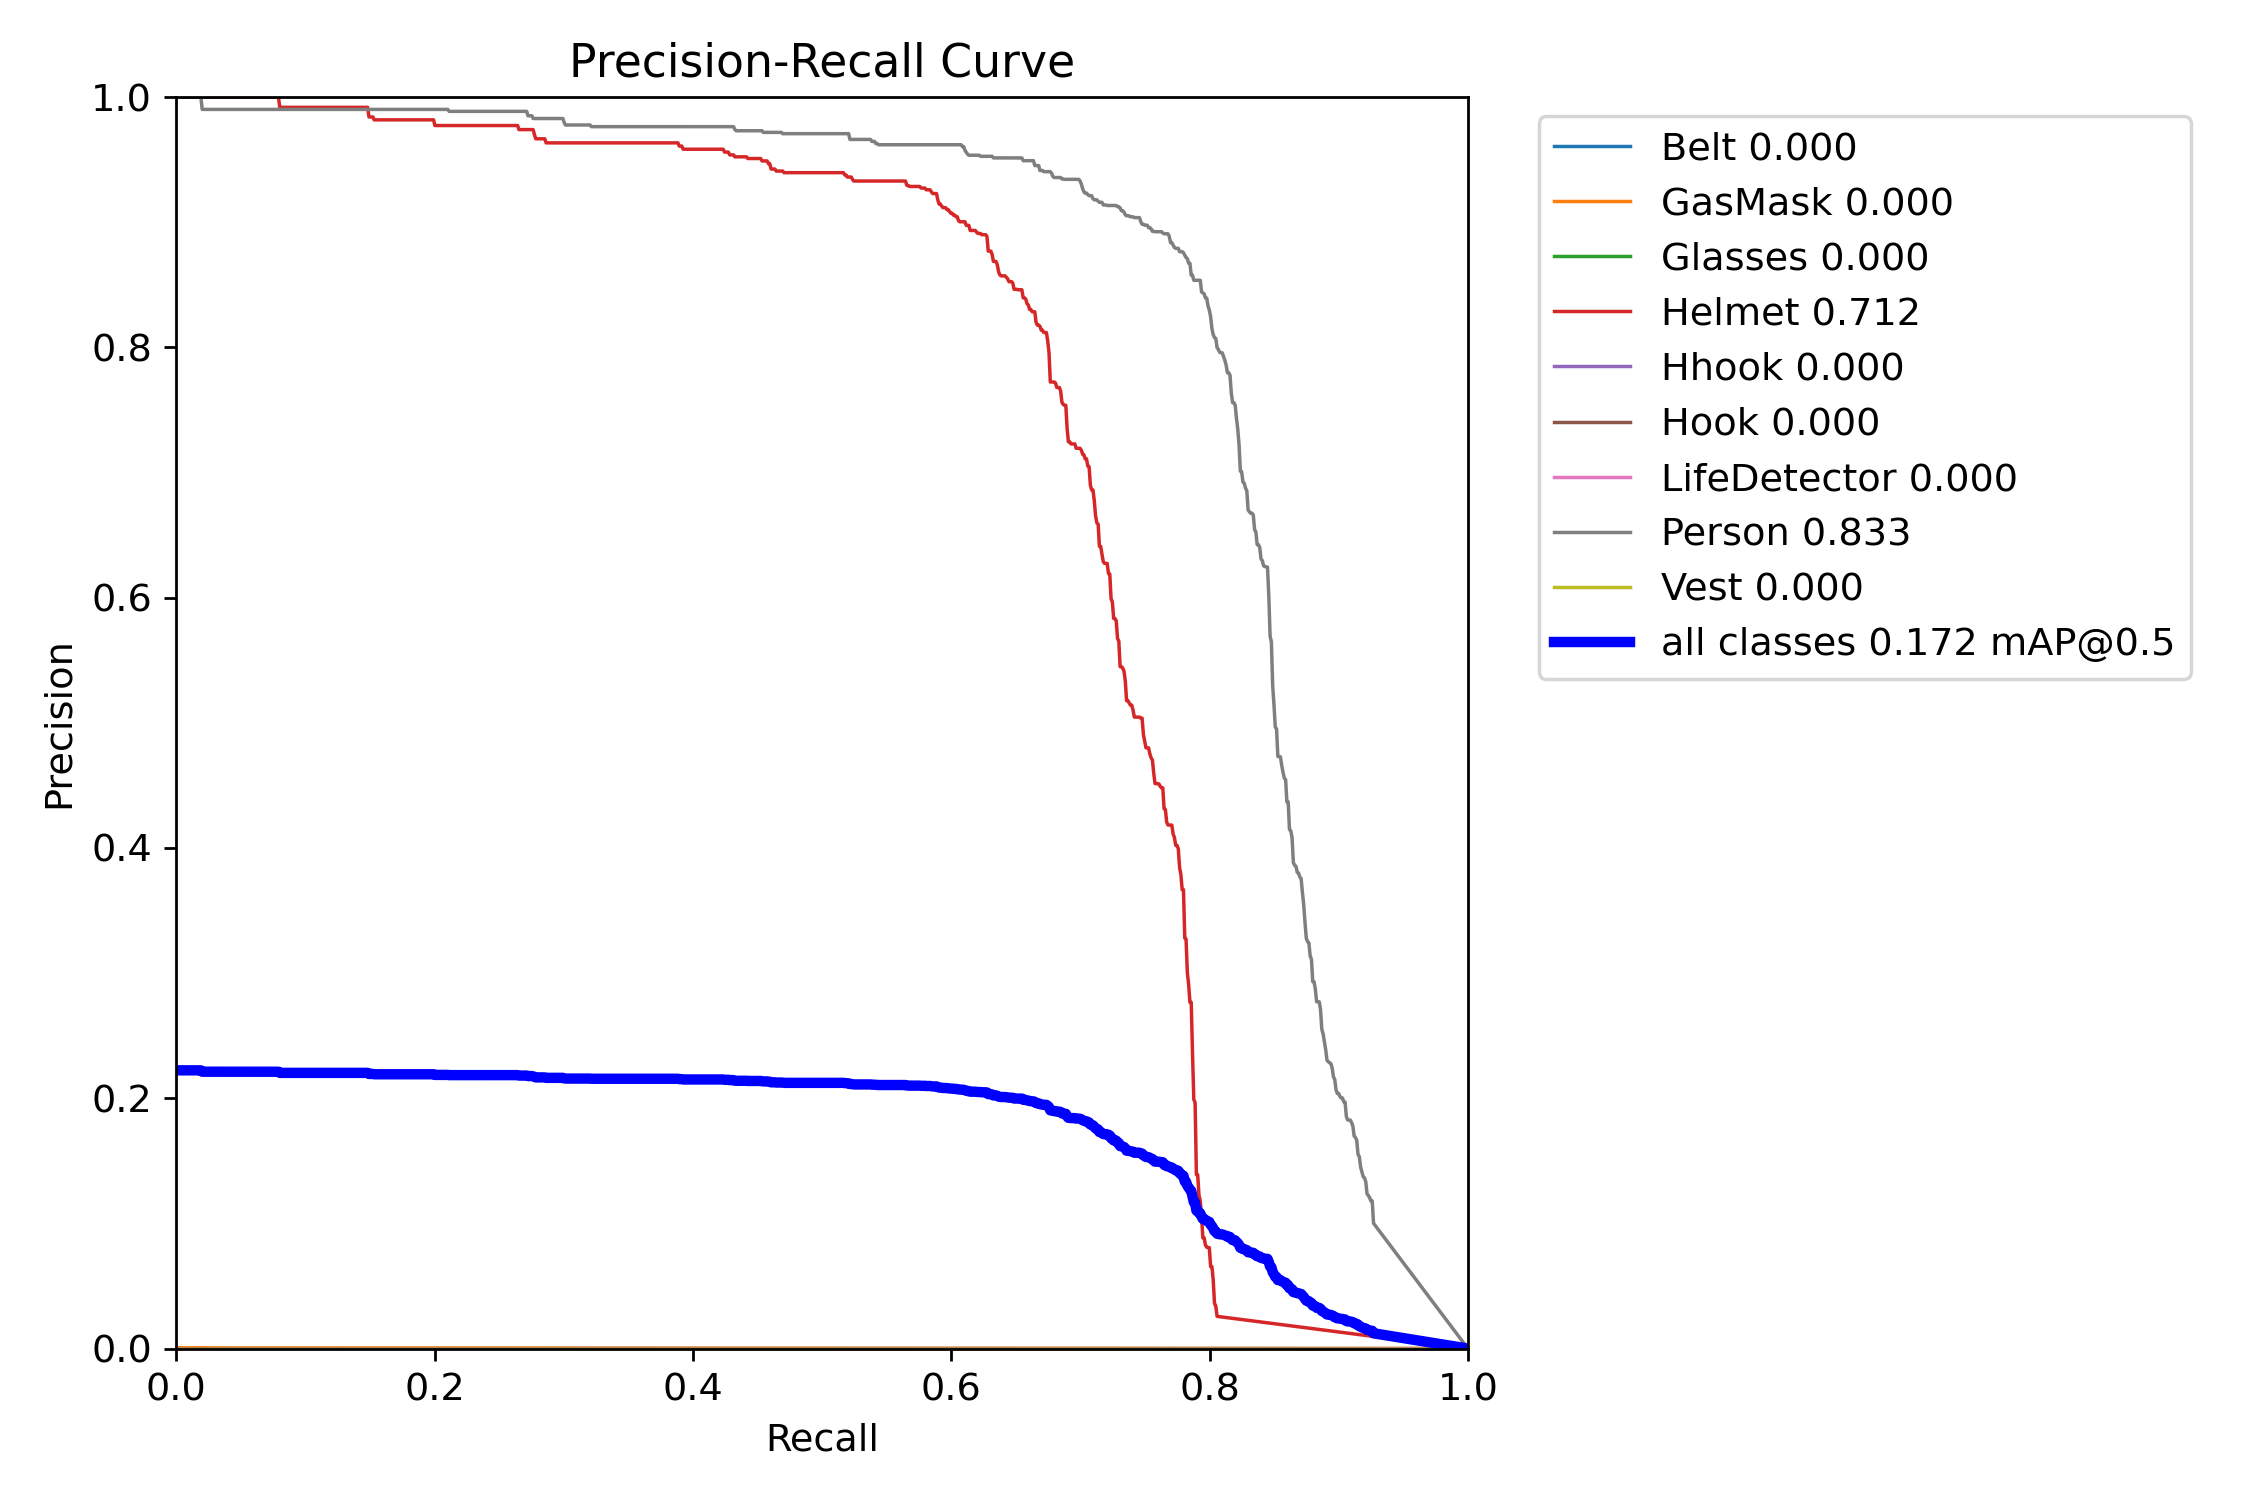

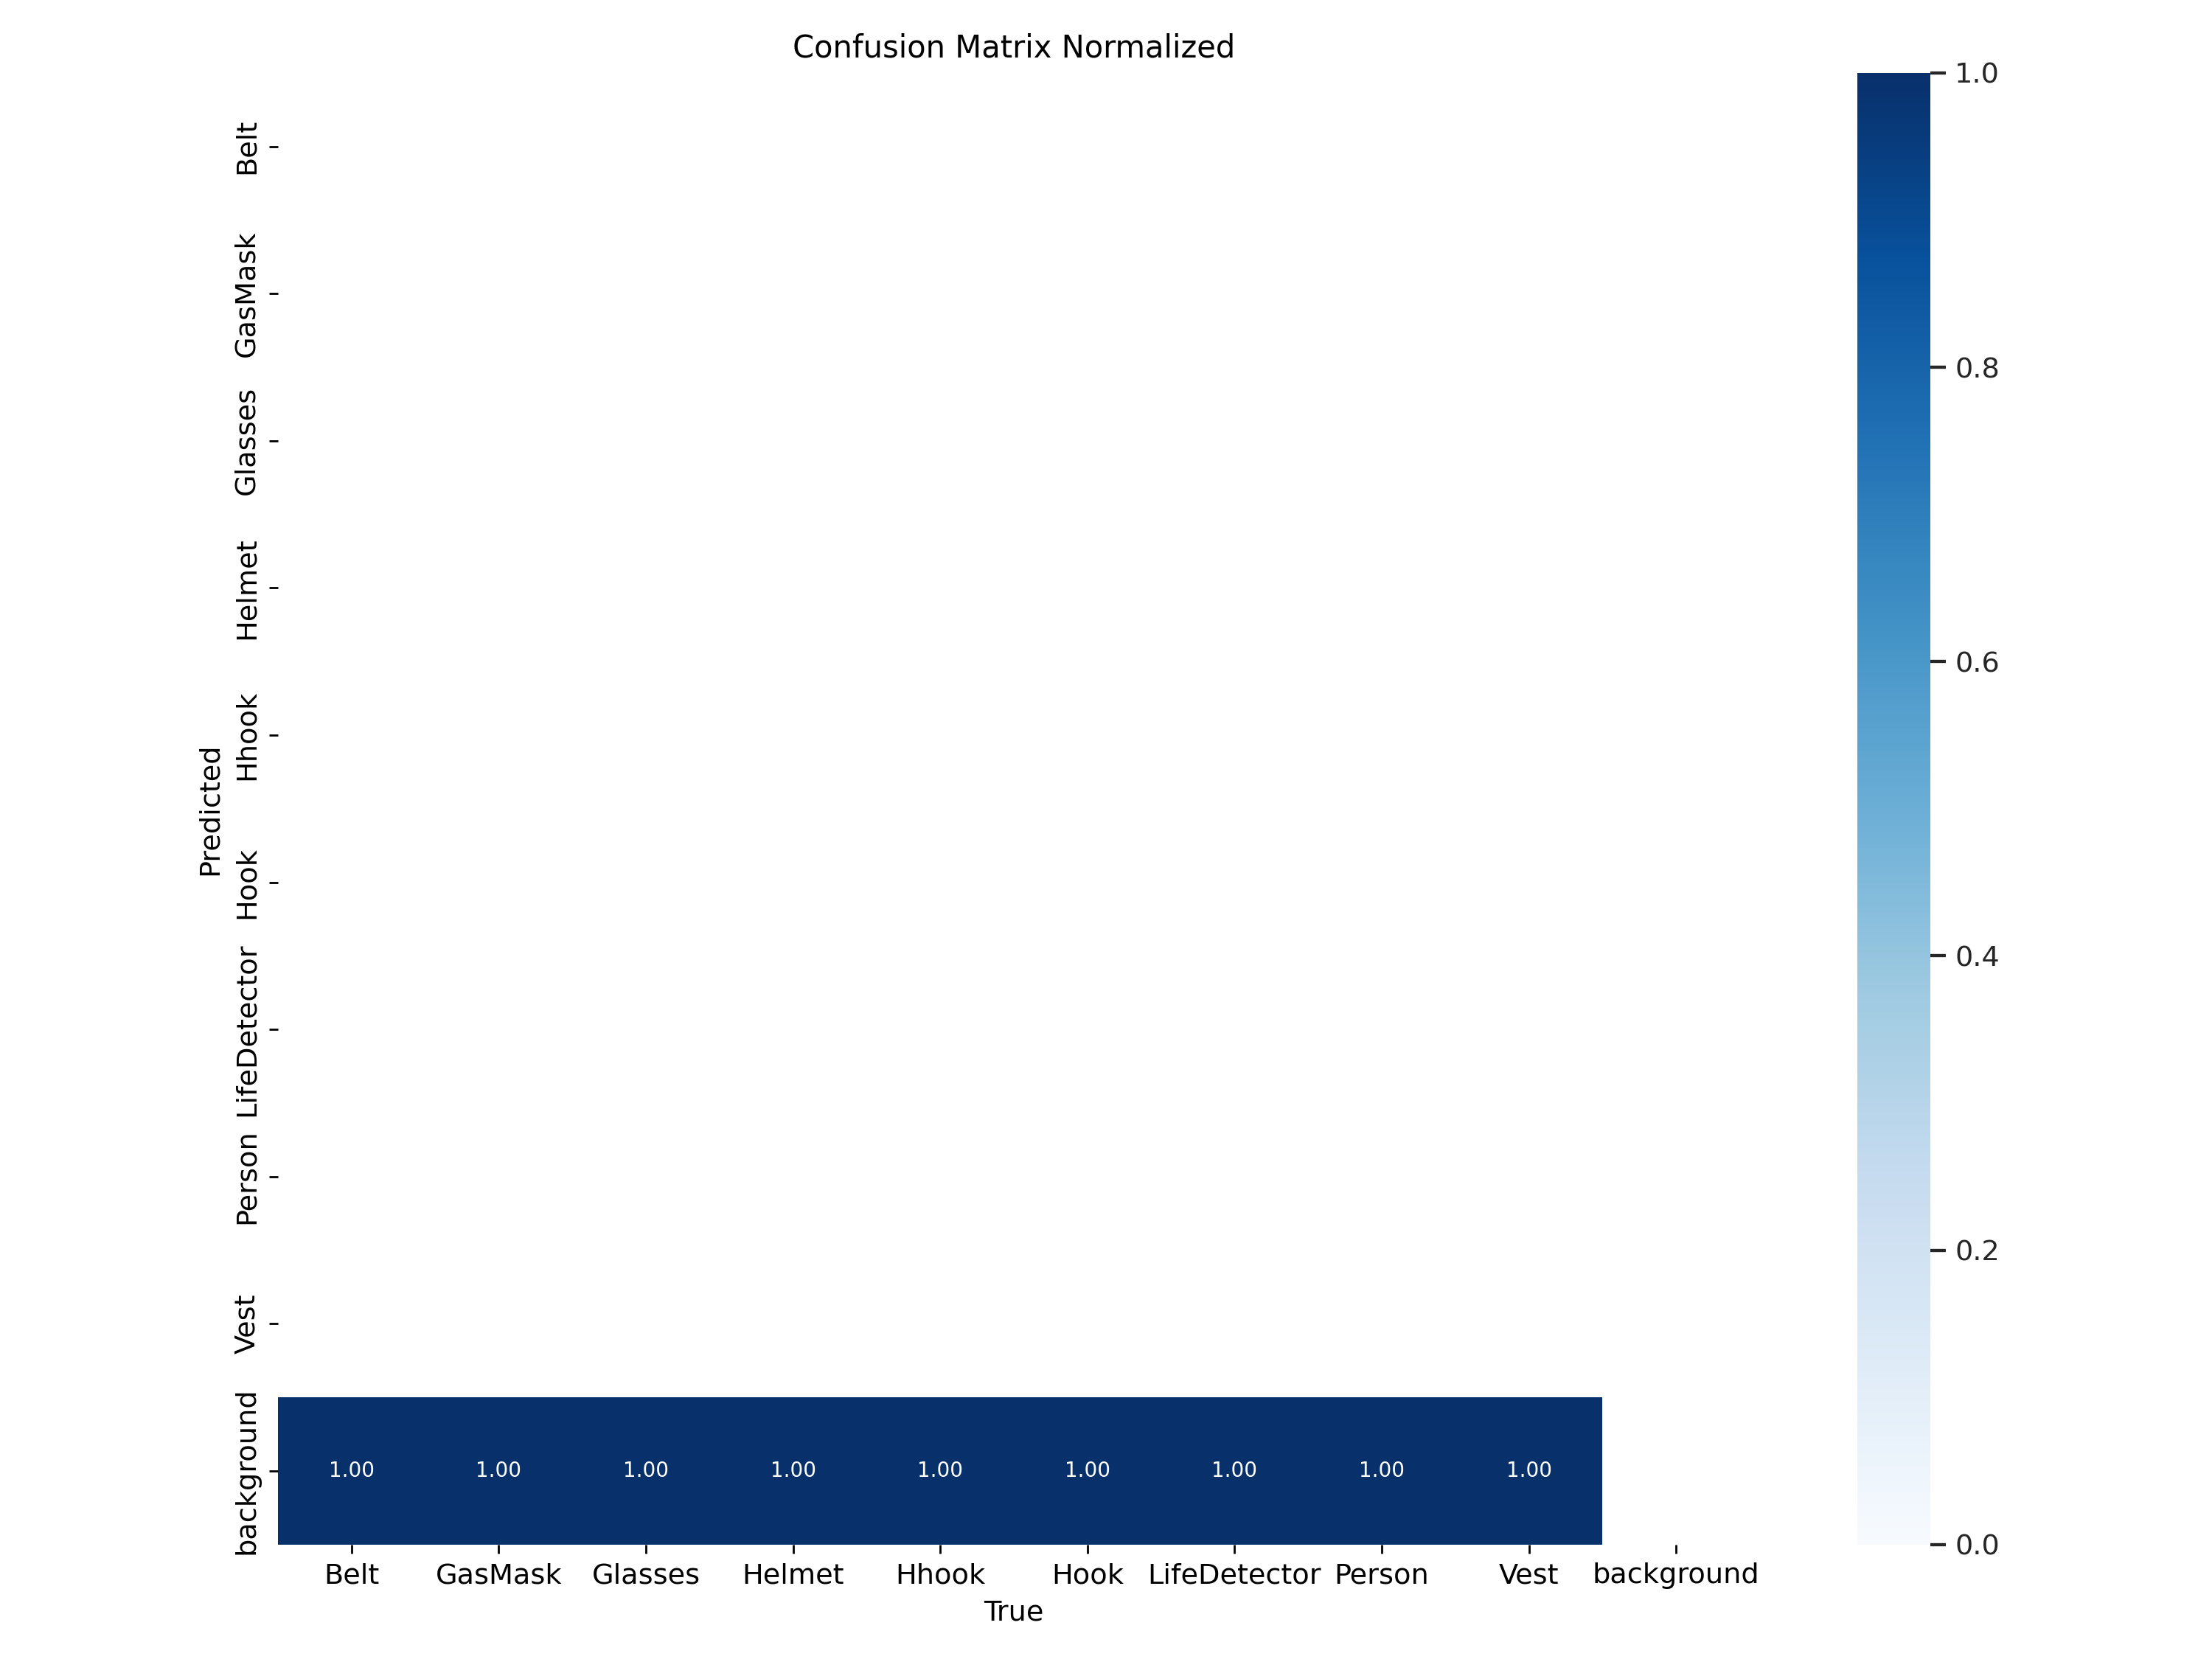

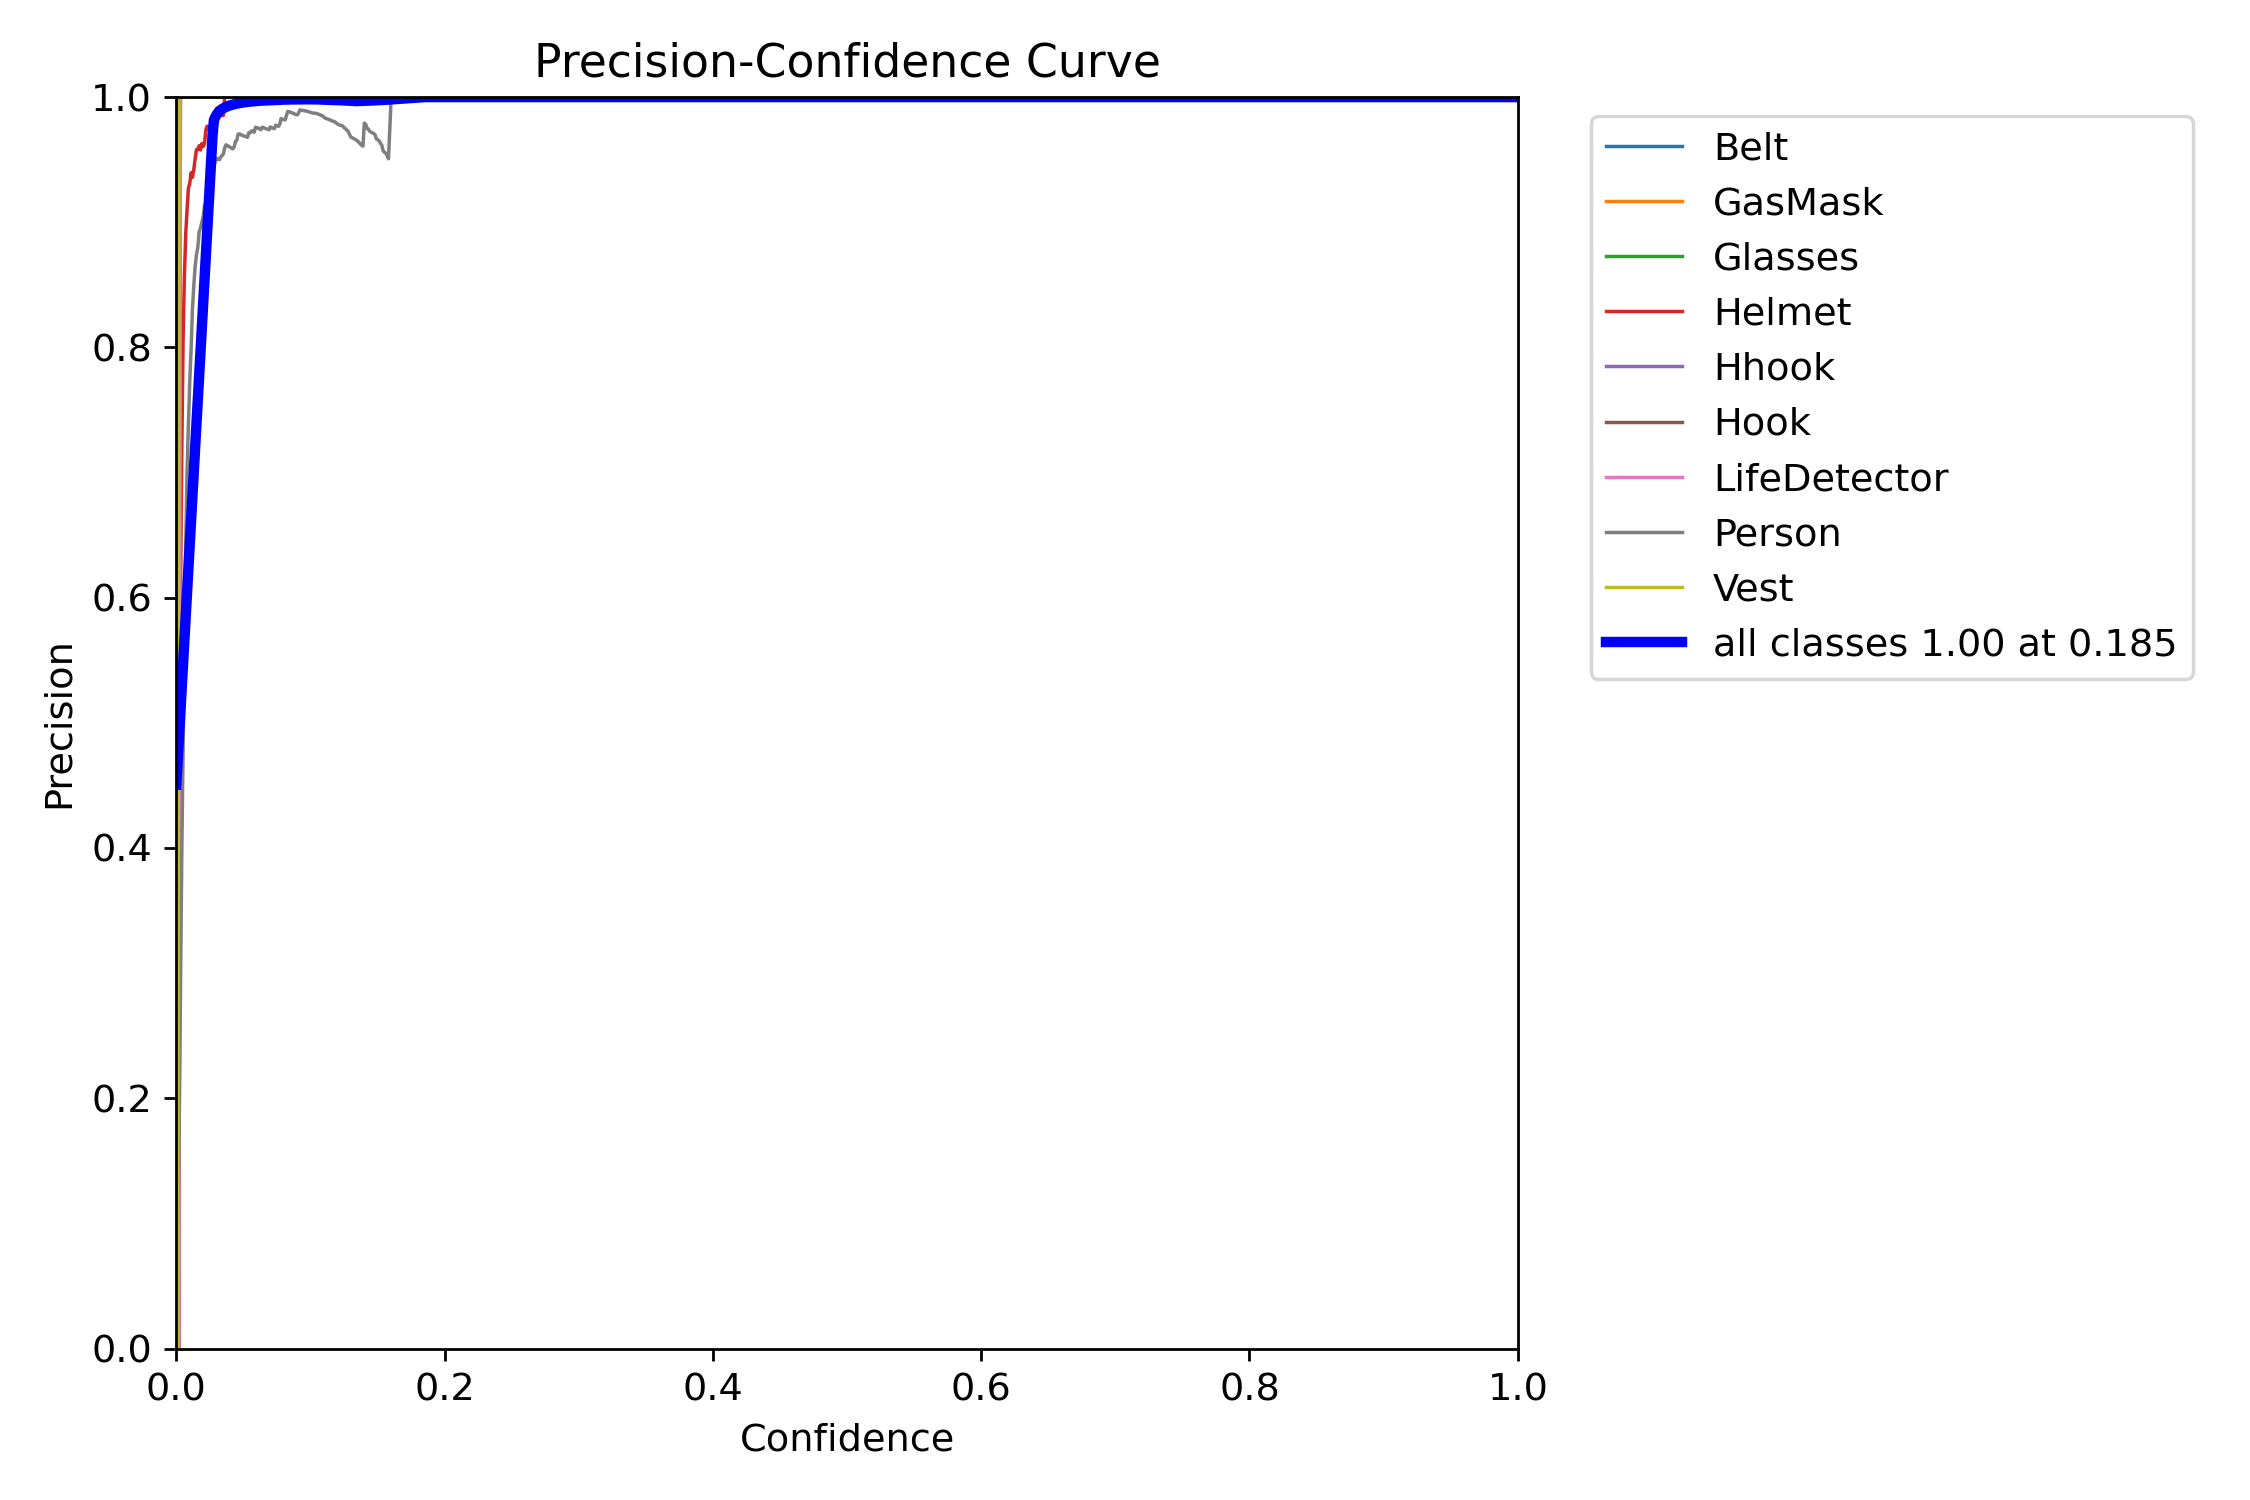

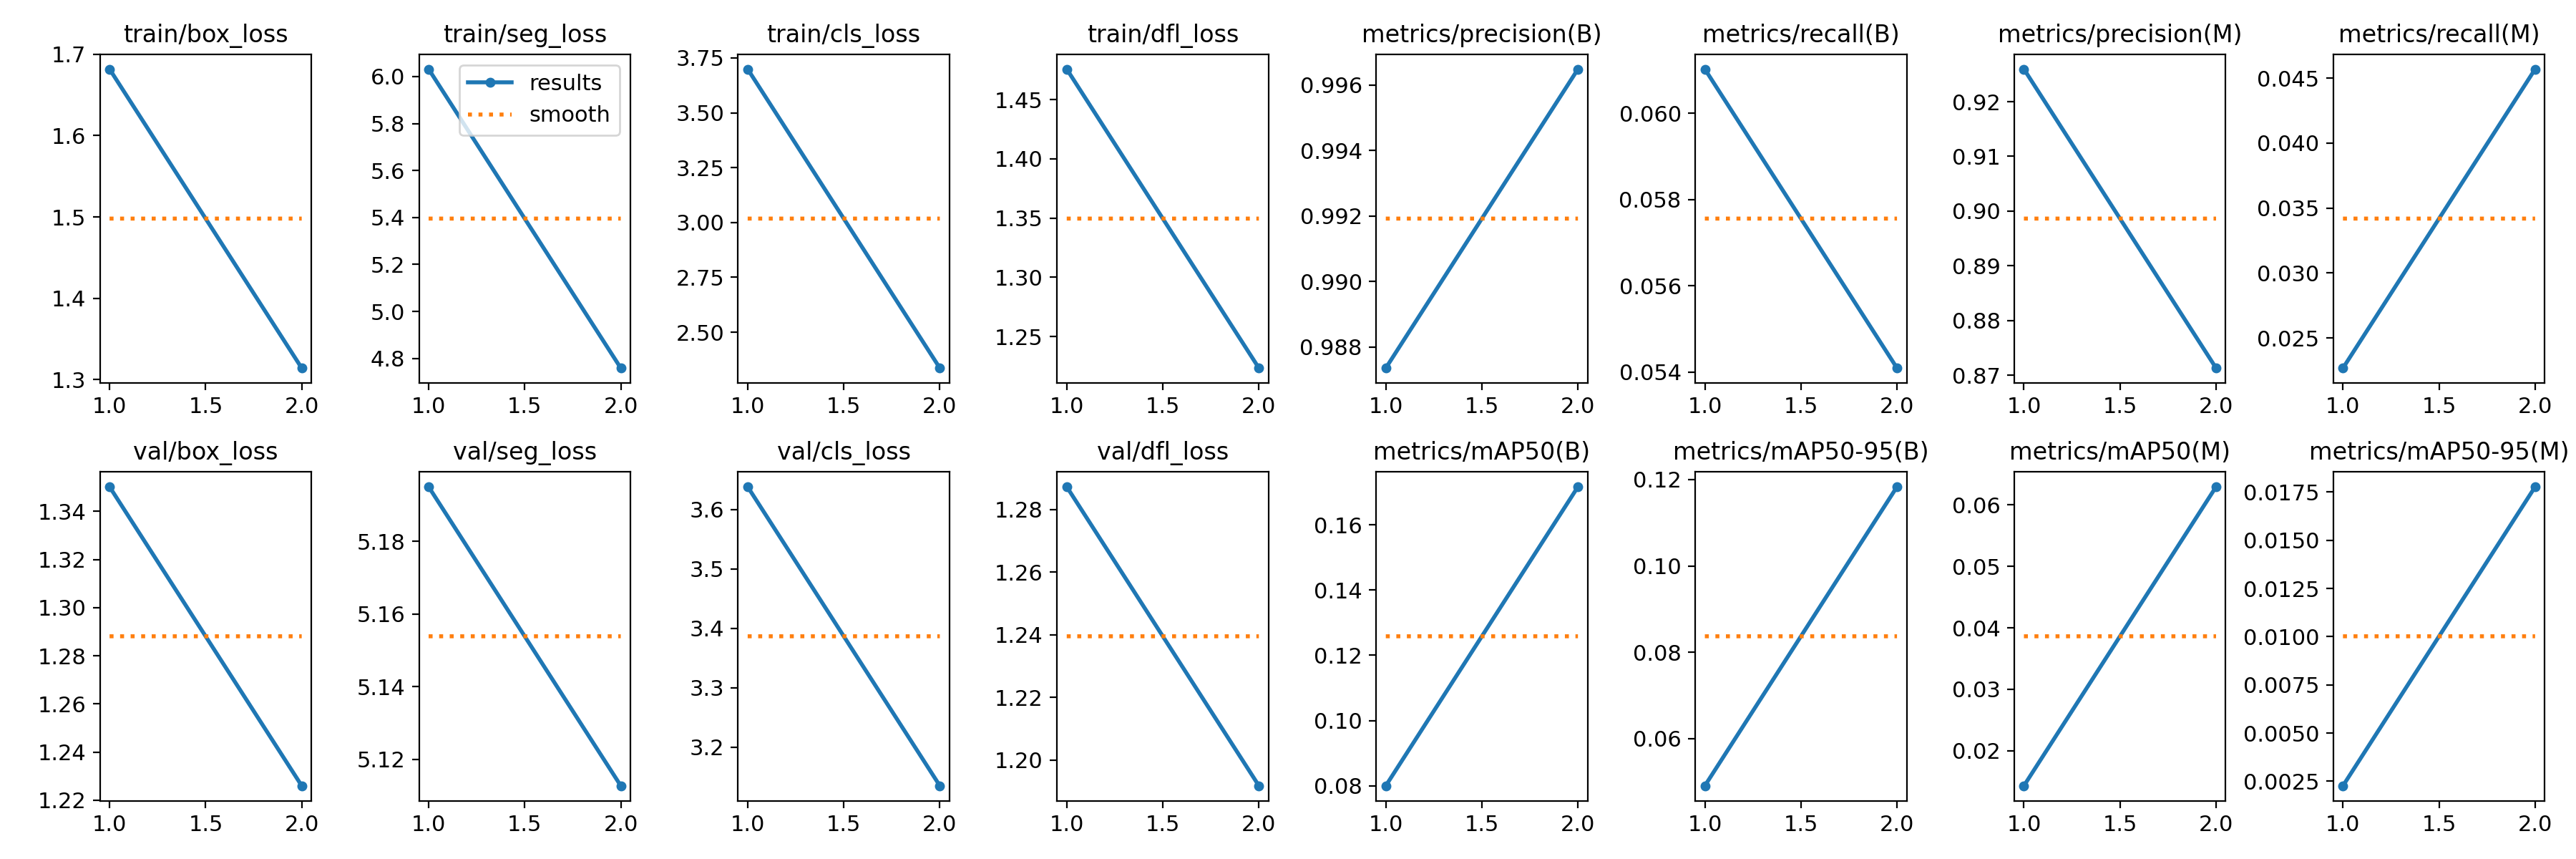

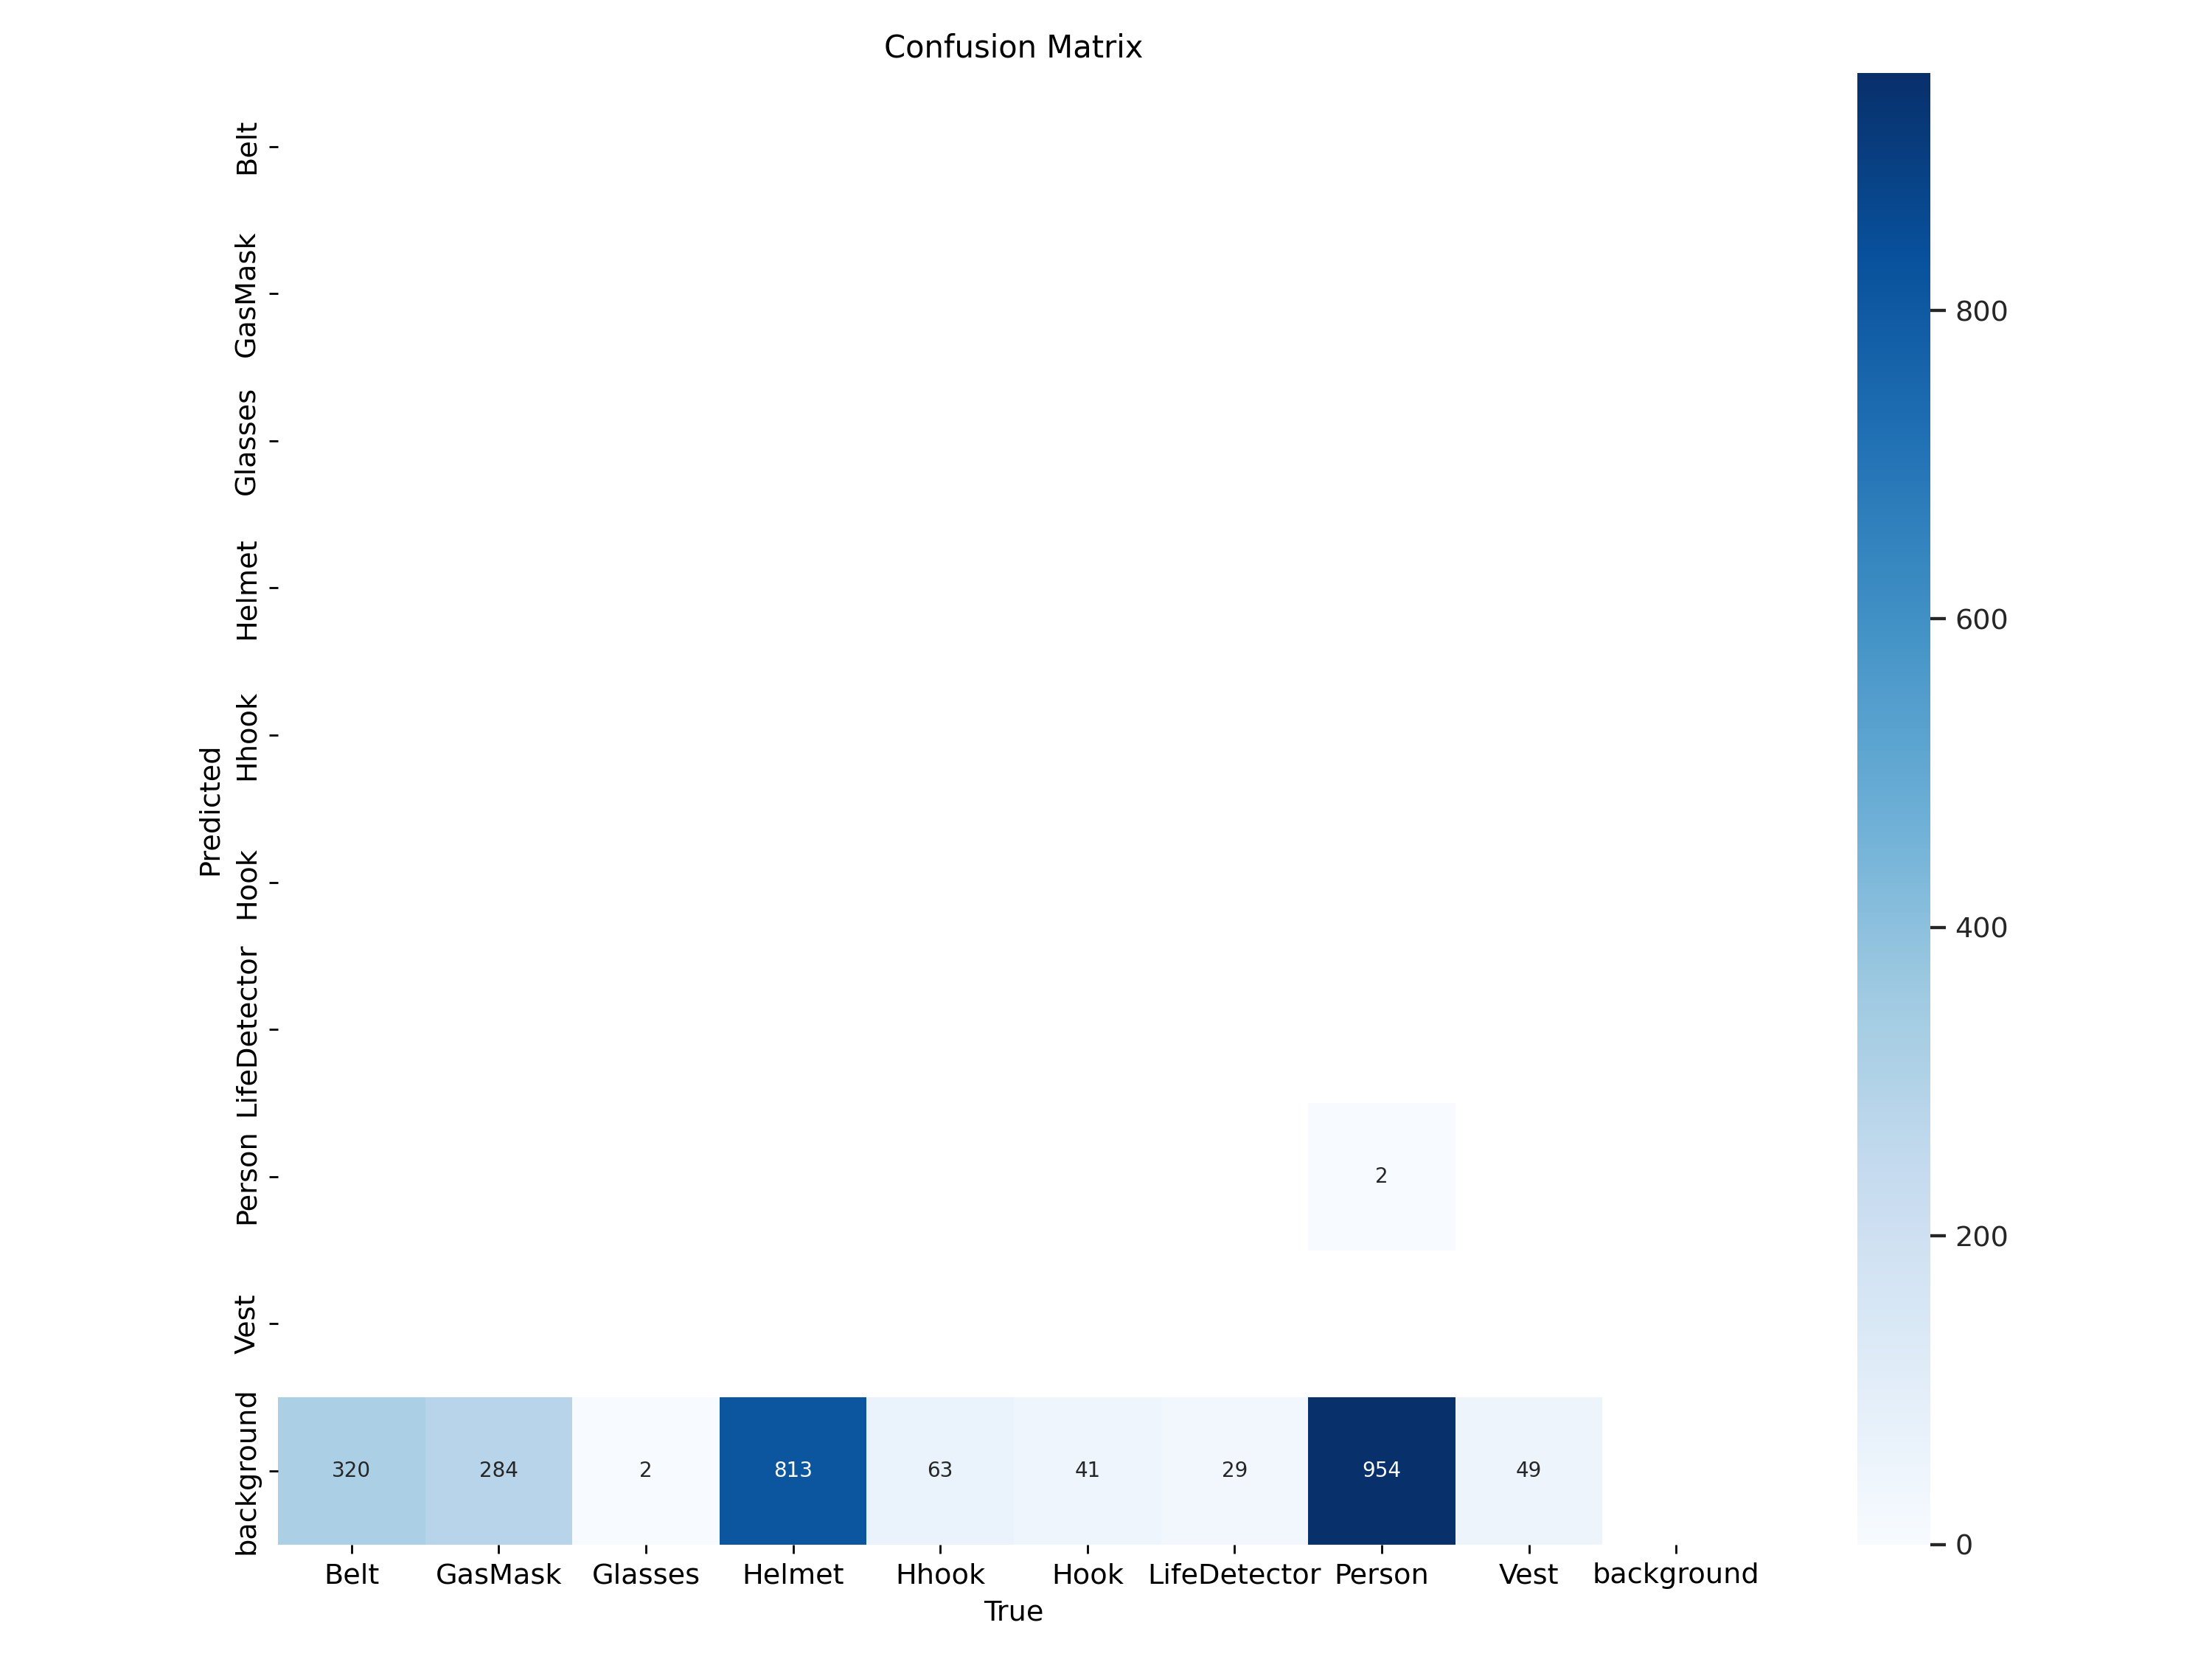

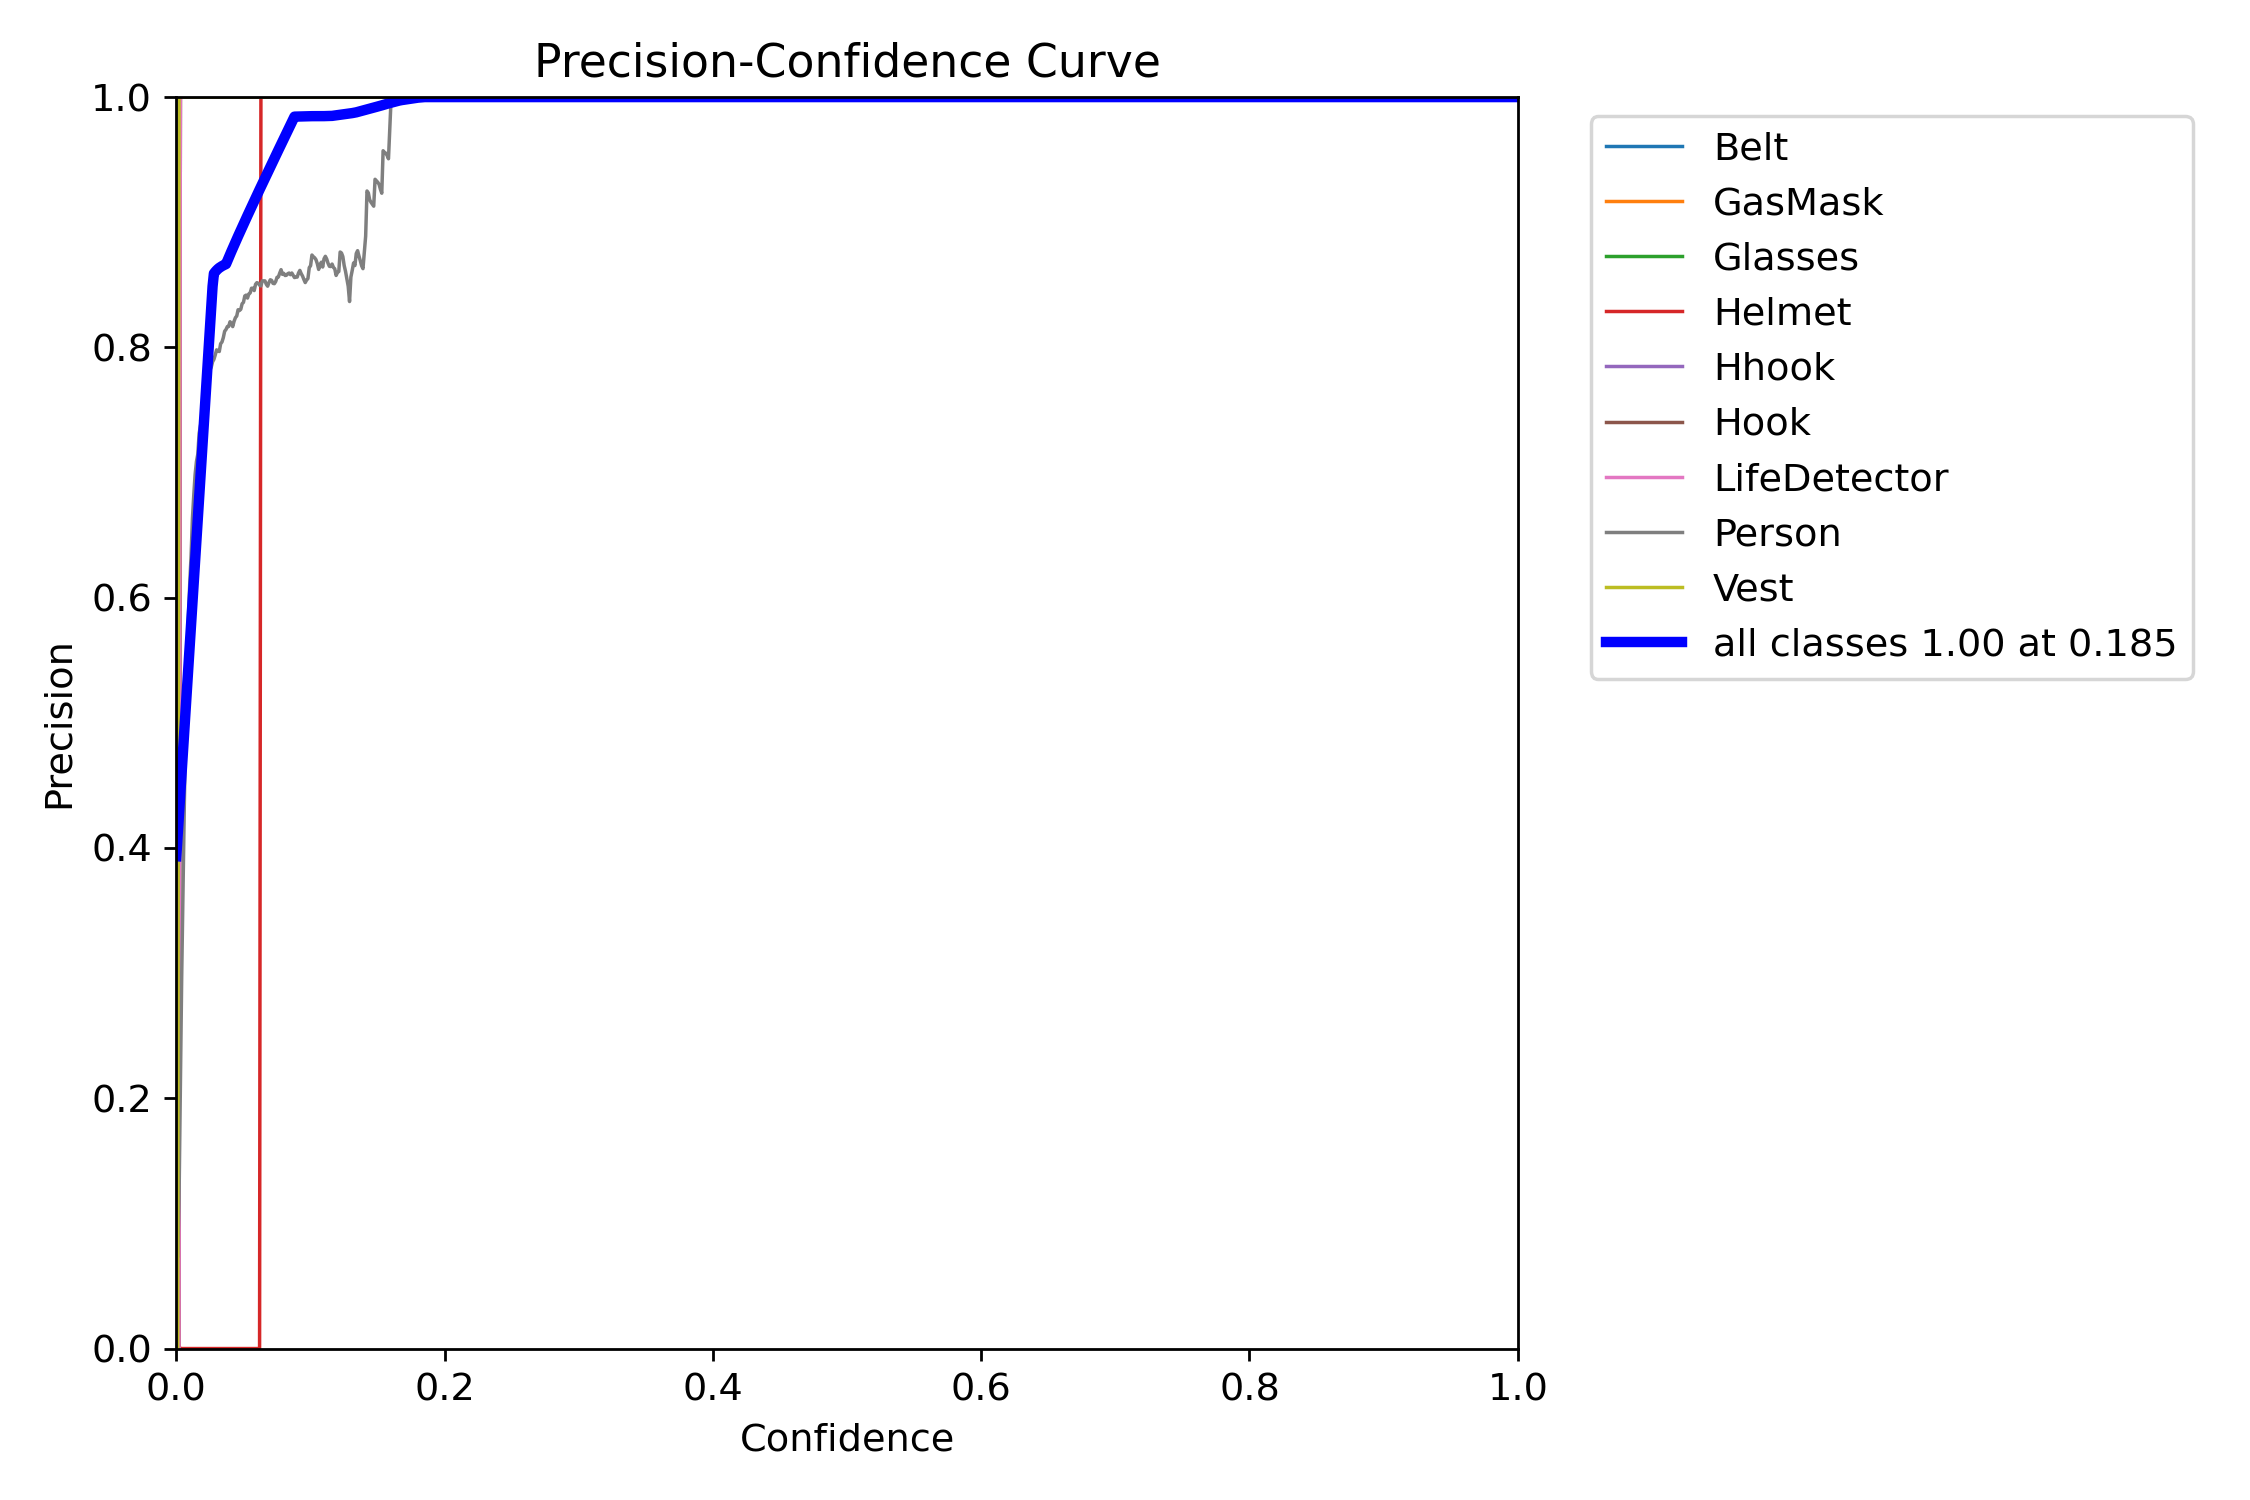

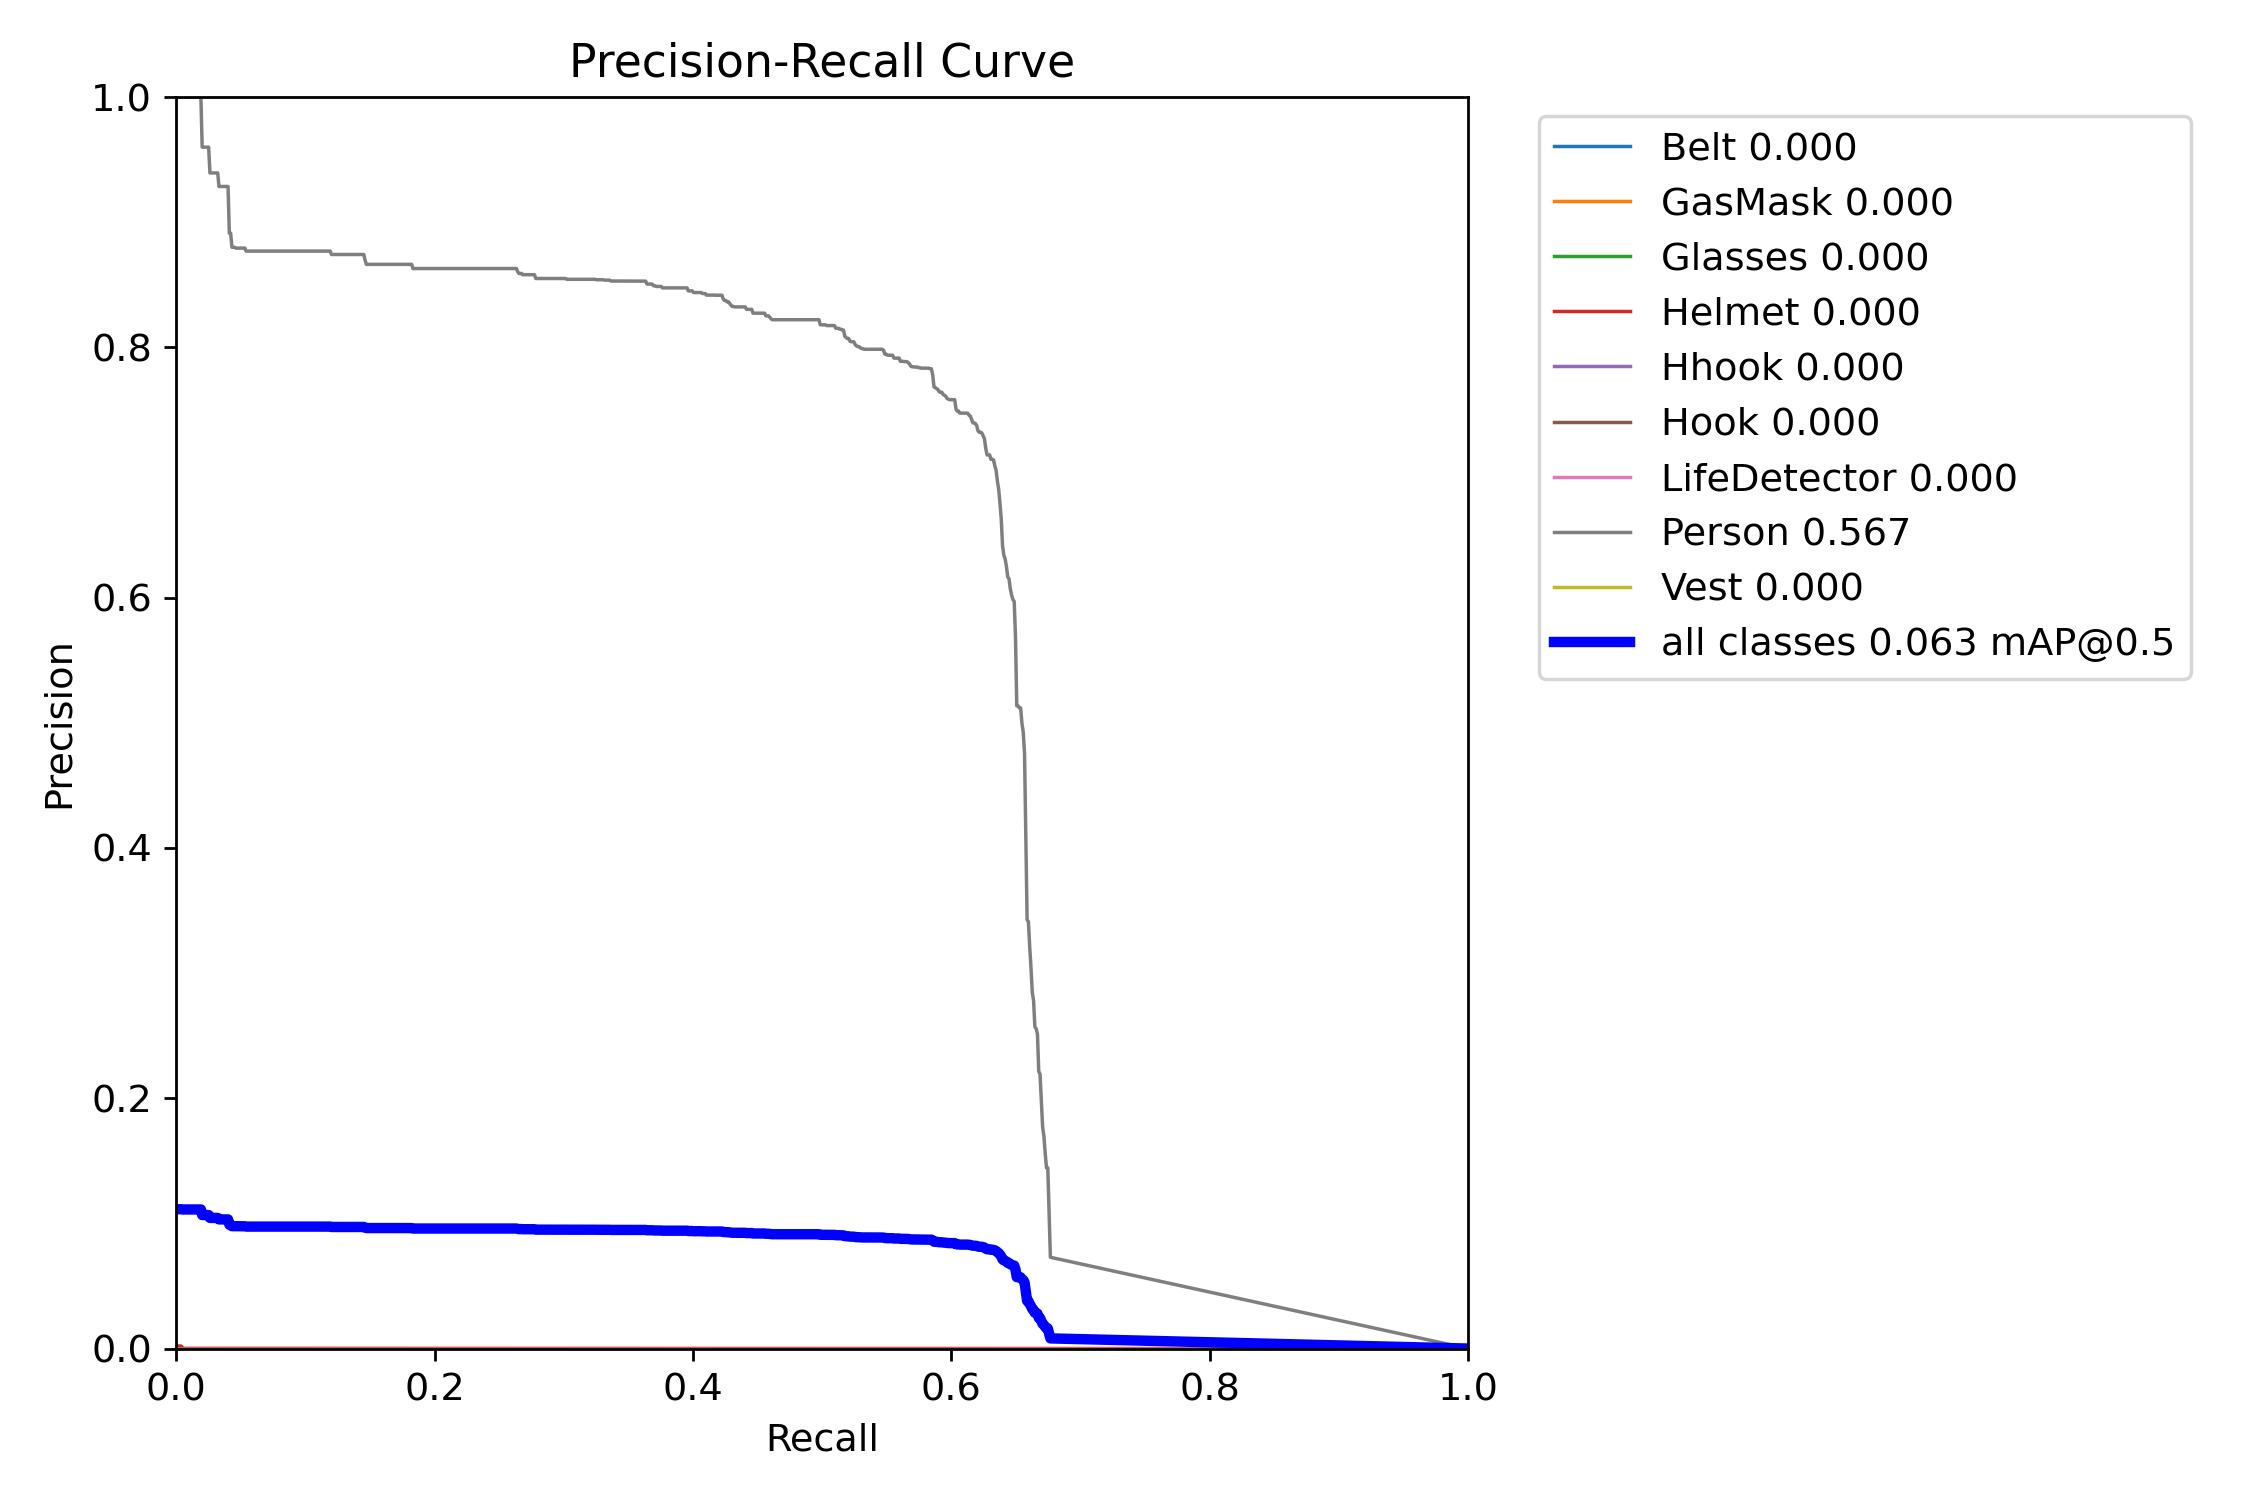

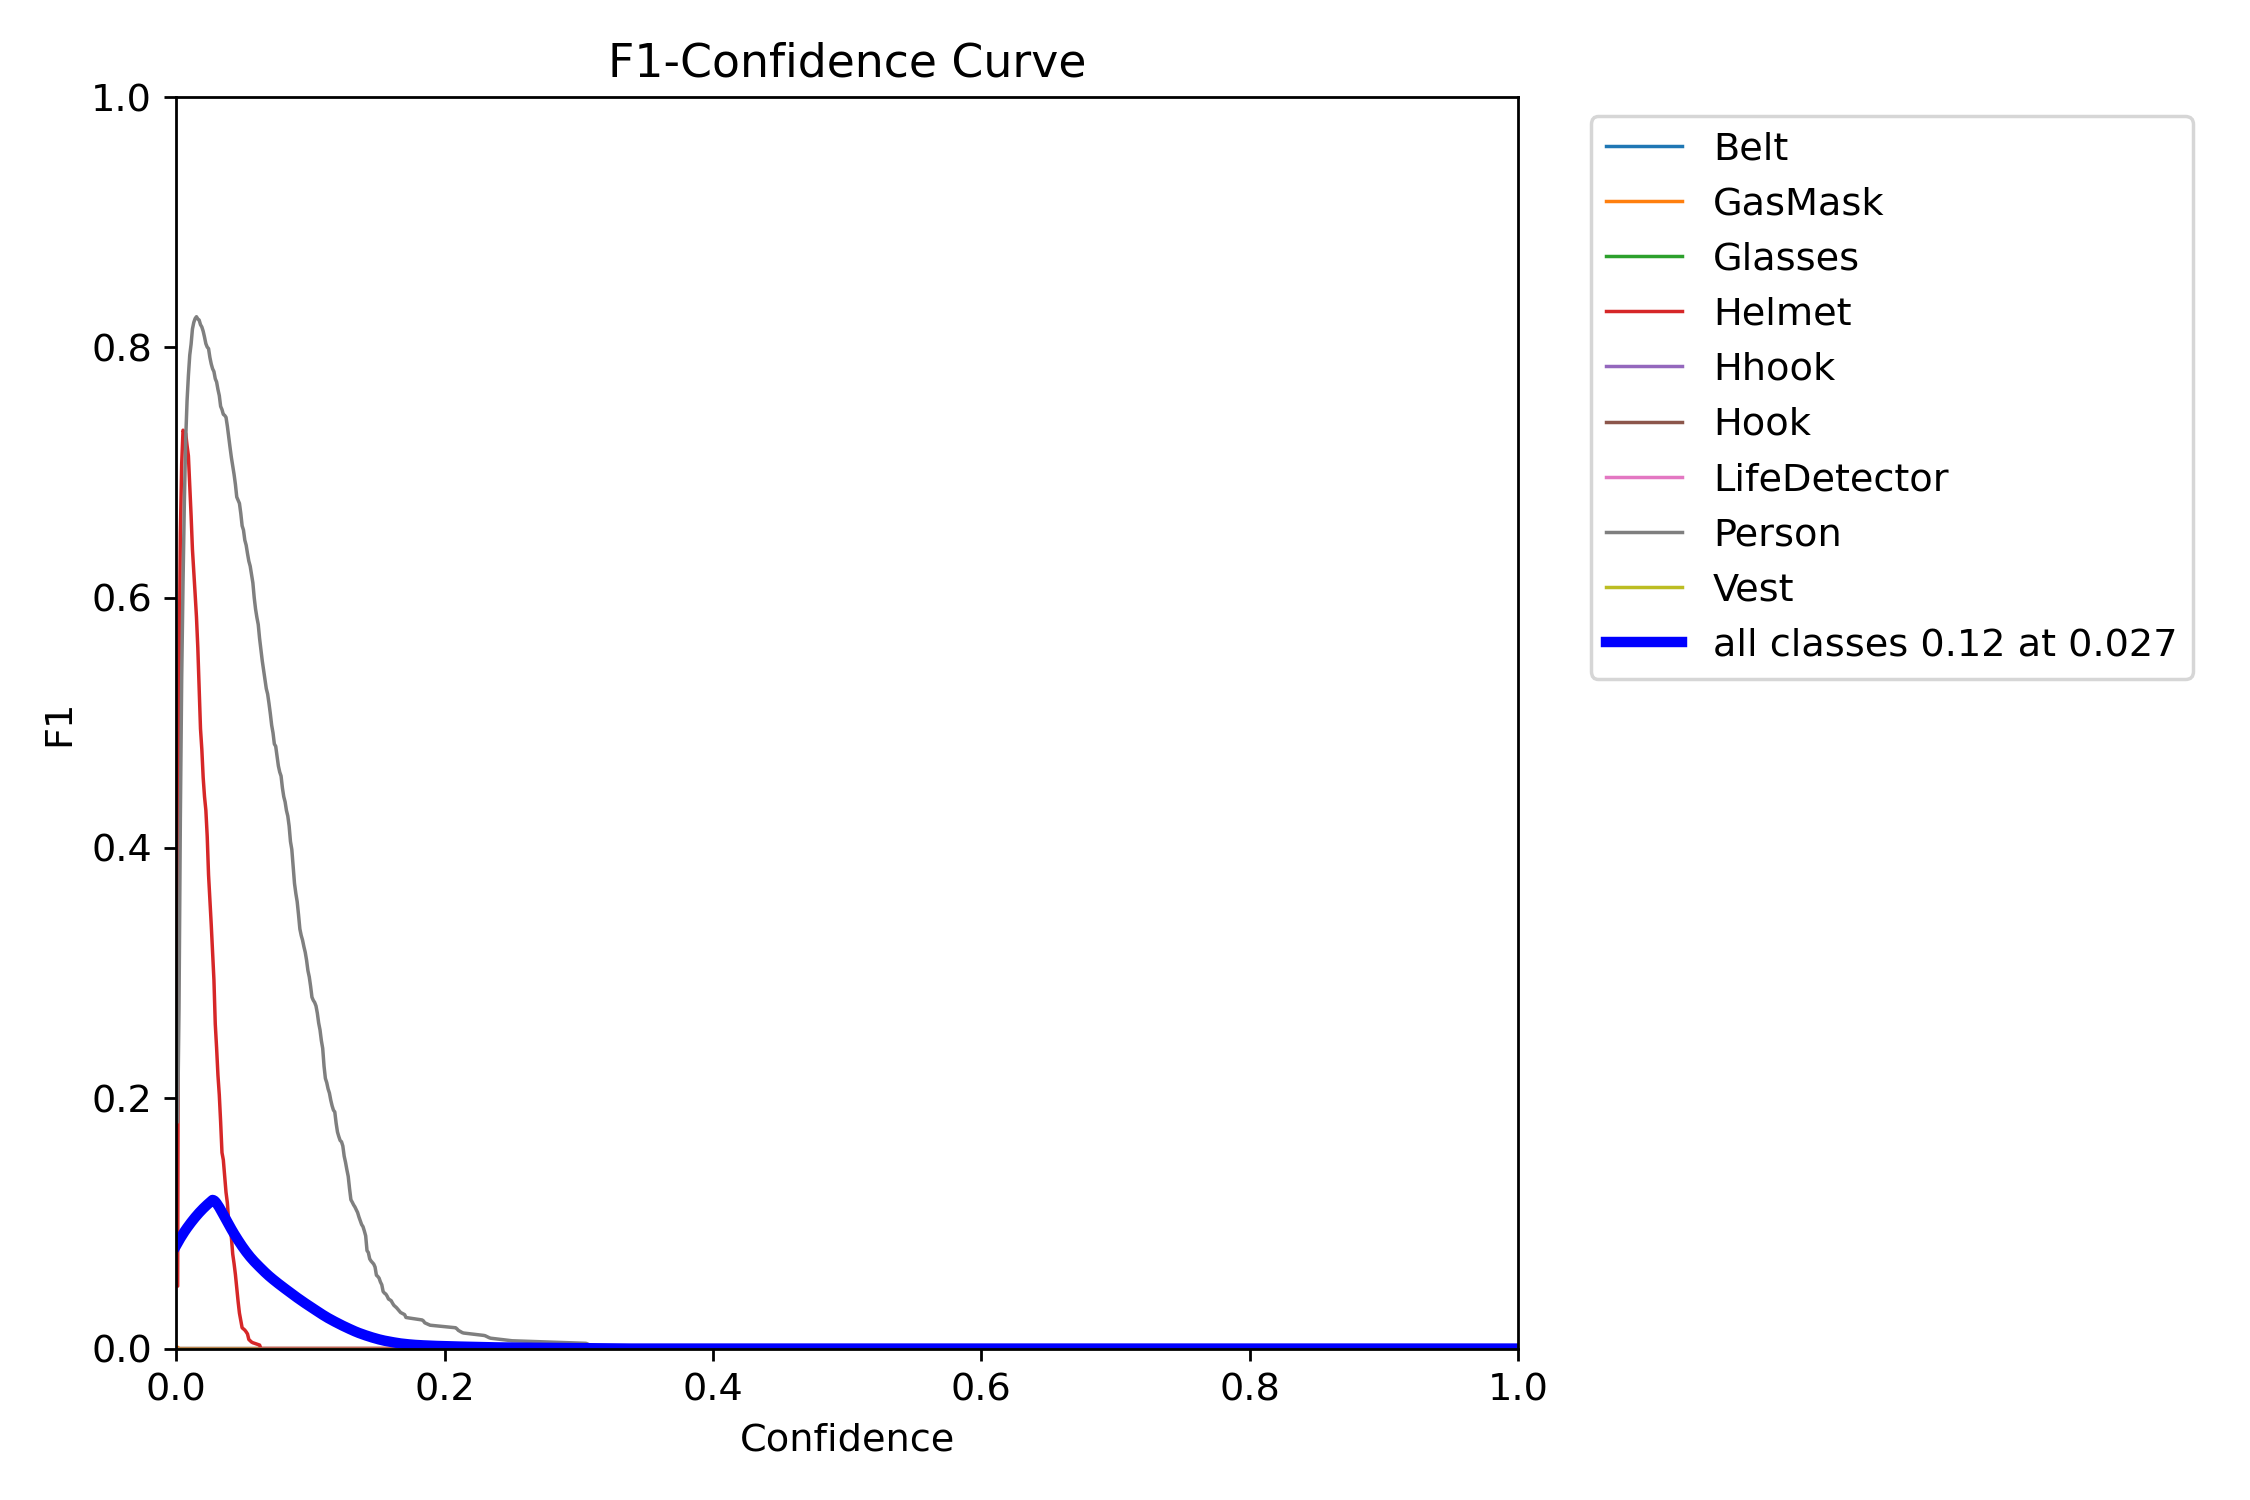

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/train3/*.png'):
      display(Image(filename=image_path, width=800))
      print("\n")

In [12]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load an official model
model = YOLO('/content/runs/segment/train/weights/best.pt')  # load a custom model

# Predict with the model
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image



100%|██████████| 476k/476k [00:00<00:00, 9.32MB/s]
image 1/1 /content/bus.jpg: 640x480 (no detections), 298.1ms
Speed: 5.1ms preprocess, 298.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


In [13]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load an official model
model = YOLO('/content/runs/segment/train/weights/best.pt')  # load a custom model

# Export the model
model.export(format='onnx')


Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3259819 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from '/content/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 45, 8400), (1, 32, 160, 160)) (37.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 255.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 11.3s, saved as '/content/runs/segment/train/weights/best.onnx' (12.6 MB)

Export complete (13.3s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=/content/runs/segment/train/weights/best.onnx im

'/content/runs/segment/train/weights/best.onnx'